## DataSet

In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,RocCurveDisplay,roc_auc_score,precision_score,recall_score, accuracy_score,f1_score

In [369]:
employee_df = pd.read_csv('IBM_employee_attrition/HR-Employee-Attrition.csv')

In [370]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [371]:
employee_df.shape

(1470, 35)

In [372]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Data Analysis

Text(0.5, 1.0, 'Job Role vs Monthly Income')

<Figure size 1500x1000 with 0 Axes>

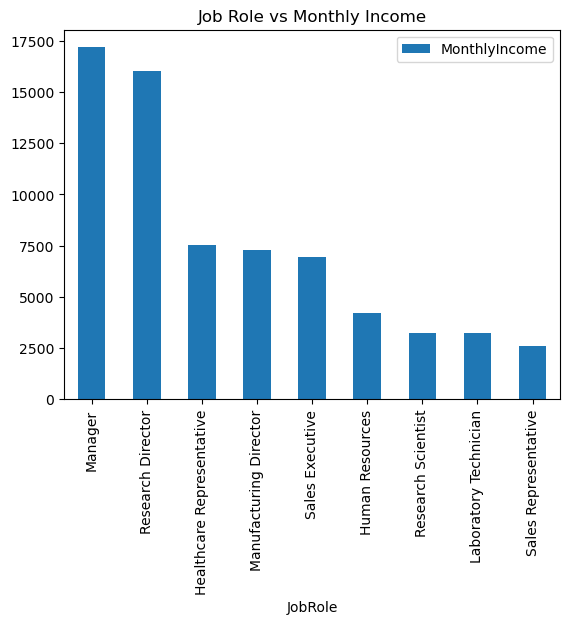

In [375]:
plt.figure(figsize=(15,10))
employee_df.groupby('JobRole')['MonthlyIncome'].mean().sort_values(ascending=False).to_frame().plot.bar()
plt.xticks(rotation=90)
plt.title('Job Role vs Monthly Income')

Text(0.5, 1.0, 'Education Field vs Monthly Income')

<Figure size 1500x1000 with 0 Axes>

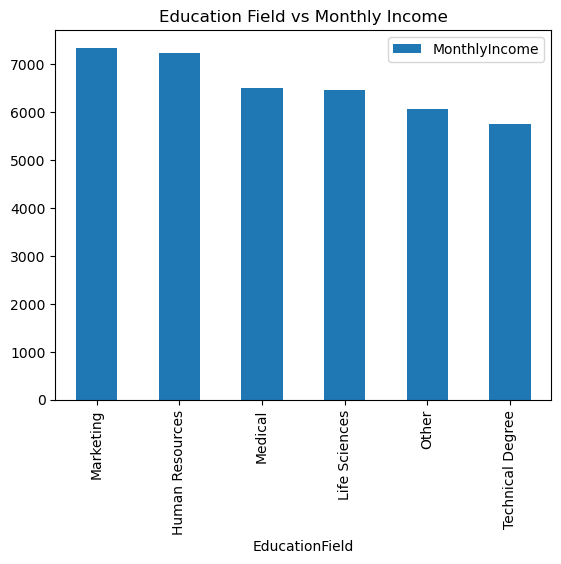

In [376]:
plt.figure(figsize=(15,10))
employee_df.groupby('EducationField')['MonthlyIncome'].mean().sort_values(ascending=False).to_frame().plot.bar()
plt.xticks(rotation=90)
plt.title('Education Field vs Monthly Income')

Text(0.5, 1.0, 'Department vs Monthly Income')

<Figure size 1500x1000 with 0 Axes>

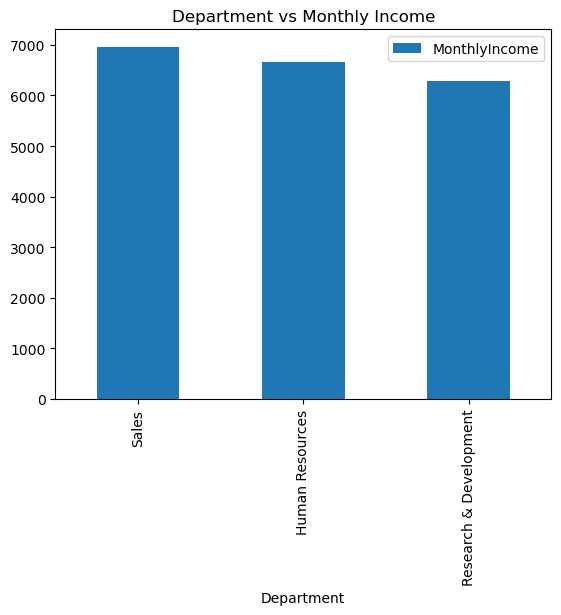

In [377]:
plt.figure(figsize=(15,10))
employee_df.groupby('Department')['MonthlyIncome'].mean().sort_values(ascending=False).to_frame().plot.bar()
plt.xticks(rotation=90)
plt.title('Department vs Monthly Income')

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

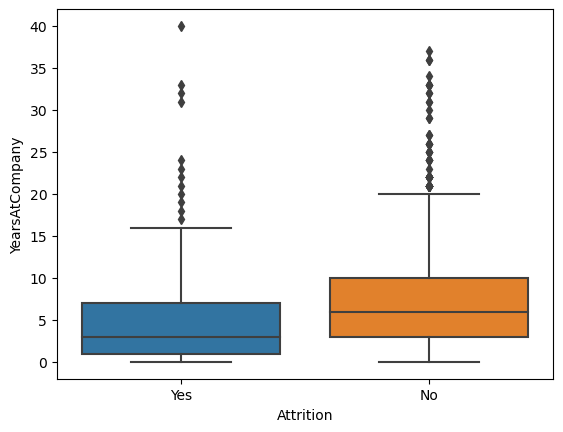

In [378]:
# fig, ax = plt.subplots(1,2)
sns.boxplot(employee_df,x='Attrition',y='YearsAtCompany')


<Axes: xlabel='Attrition', ylabel='YearsInCurrentRole'>

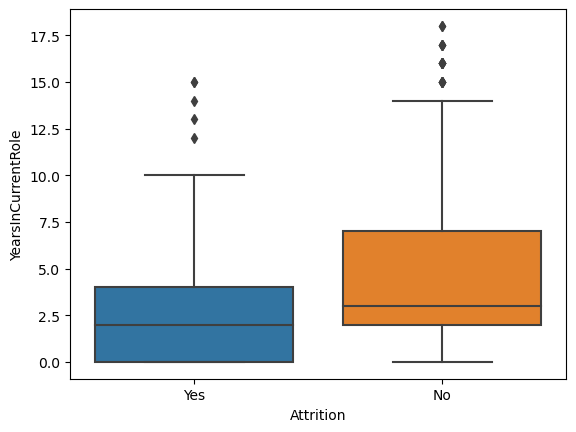

In [379]:
sns.boxplot(employee_df,x='Attrition',y='YearsInCurrentRole')

## Feature Engineering

In [551]:
target_var = employee_df['Attrition']

In [553]:
num_columns = ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike',
              'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
               'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [555]:
cat_columns = [  'Department', 'MaritalStatus', 'Over18', 'Gender','Education','EducationField',
                   'BusinessTravel', 'JobLevel', 'JobRole','EnvironmentSatisfaction','JobInvolvement', 'JobSatisfaction',
               'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

In [557]:
cols_to_compute =['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike',
              'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
               'YearsSinceLastPromotion', 'YearsWithCurrManager','Department', 'MaritalStatus', 'Over18', 'Gender','Education','EducationField',
                   'BusinessTravel', 'JobLevel', 'JobRole','EnvironmentSatisfaction','JobInvolvement', 'JobSatisfaction',
               'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

In [559]:
X_train, X_test, y_train, y_test = train_test_split(
    employee_df[cols_to_compute],
    target_var,
    test_size=0.20, random_state=42)

### 1. Median Imputer

In [562]:
X_train_num = X_train[num_columns] 
X_test_num = X_test[num_columns]

In [563]:
X_train_num.isnull().sum()

Age                        0
DistanceFromHome           0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

### 2. Outliers handling

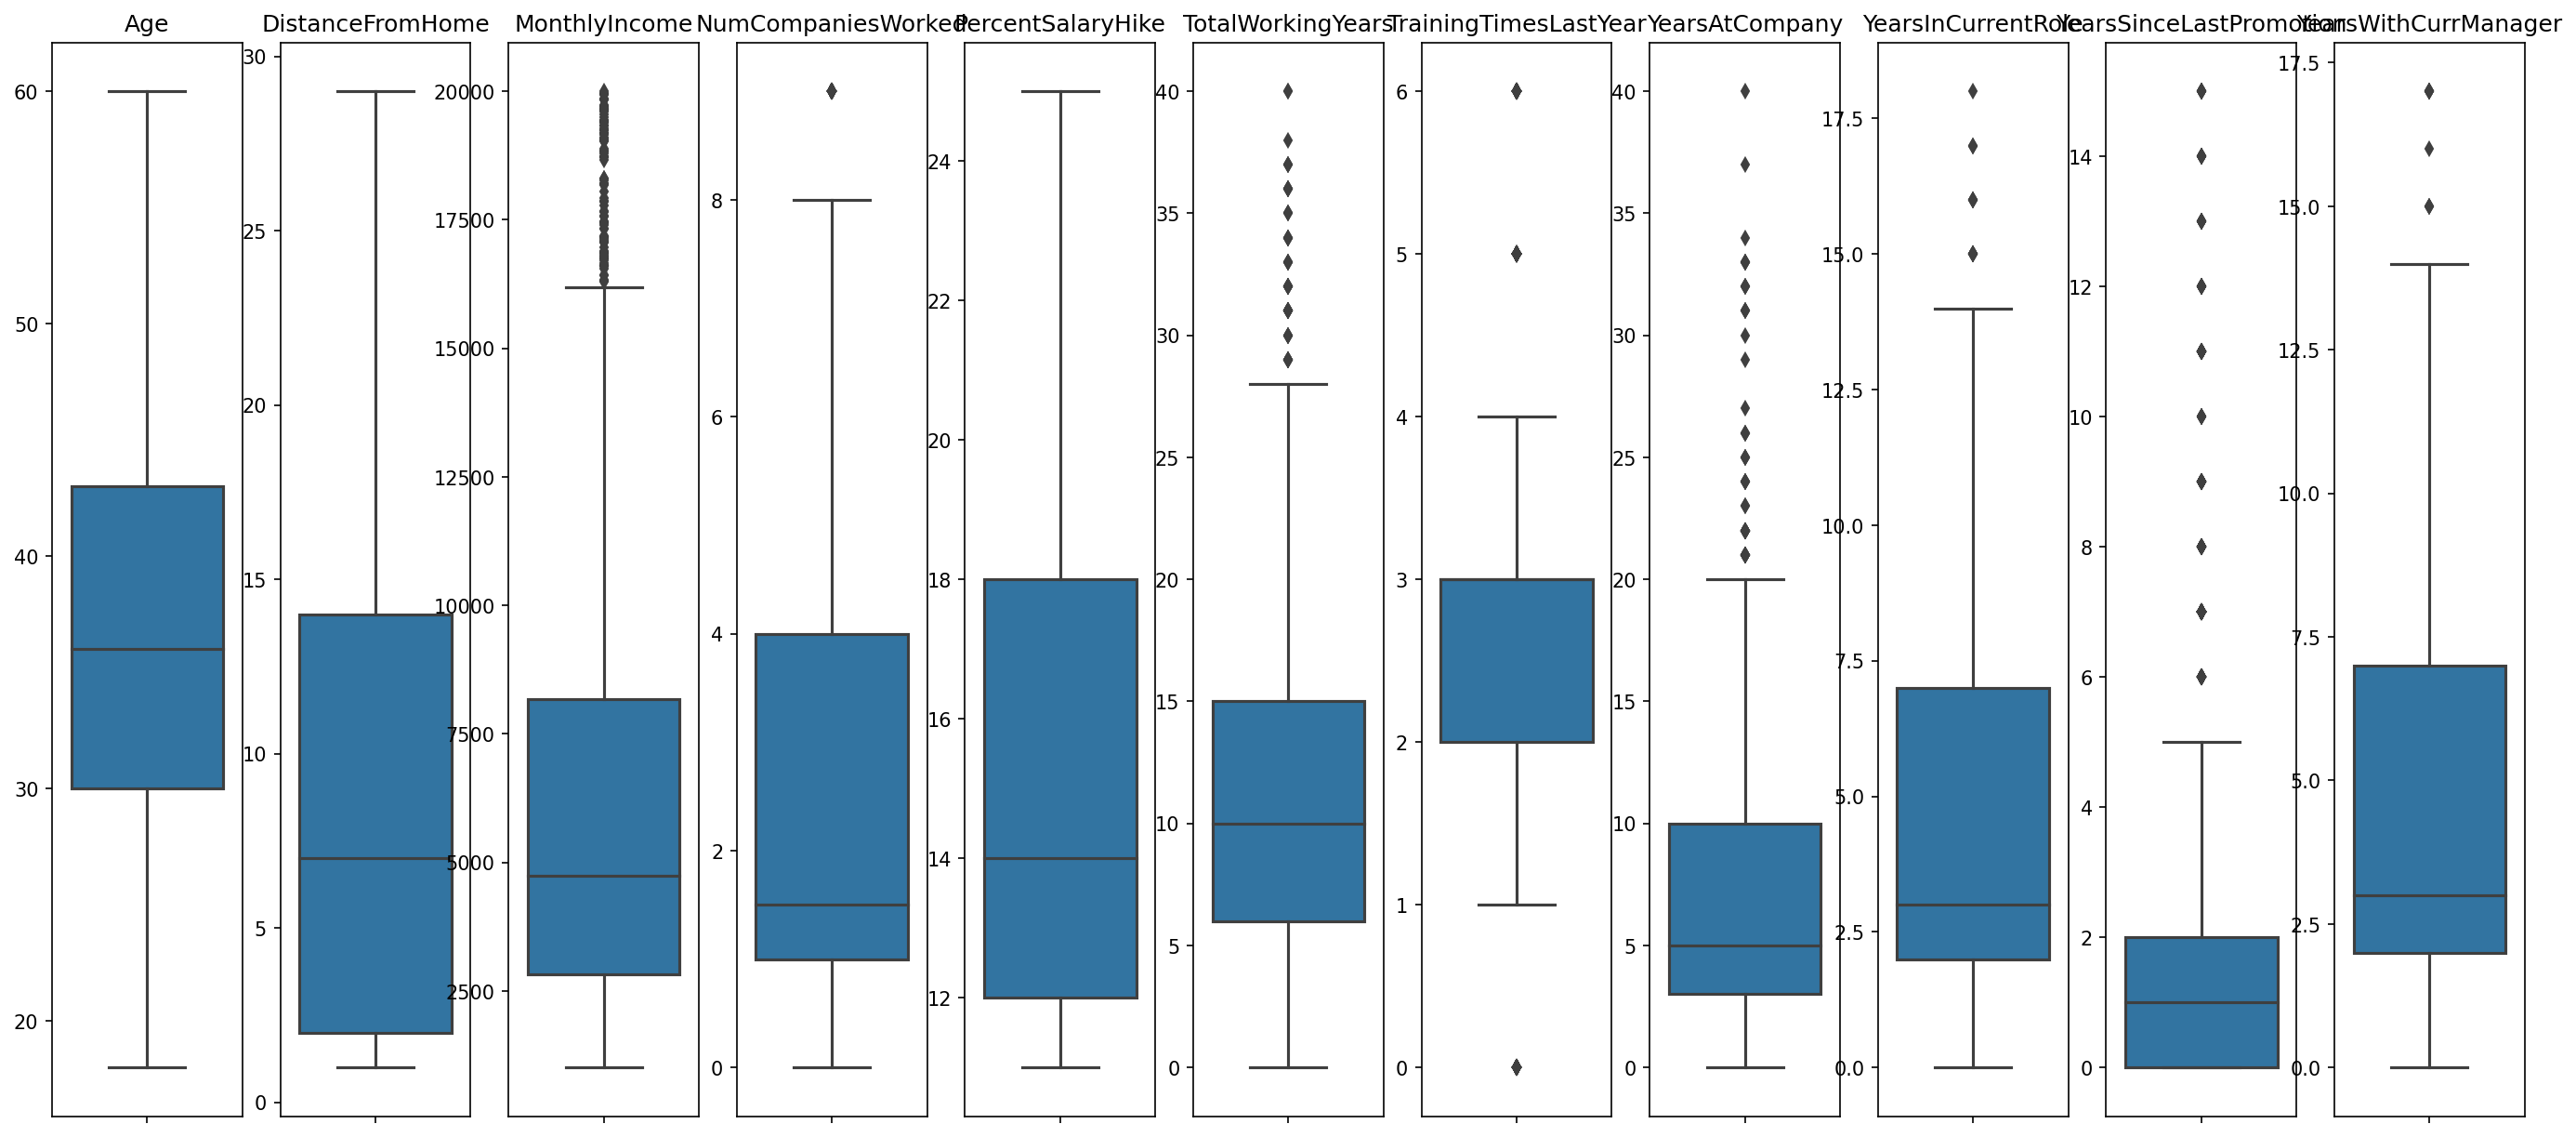

In [567]:
plt.figure(figsize=(25,10),dpi=150)
for i,var in enumerate(num_columns):
    plt.subplot(1,len(num_columns)+1,(i+1))
    ax=sns.boxplot(y=X_train_num[var])
    ax.set(ylabel=None)
    ax.set(title=var)
#     plt.tight_layout

In [568]:
def outlier_handle(col_name):
    third_quantile = X_train_num[col_name].quantile(0.75)
    first_quantile = X_train_num[col_name].quantile(0.25)
    IQR = third_quantile - first_quantile
    lower_range = first_quantile - 1.5*(IQR)
    upper_range = third_quantile + 1.5*(IQR)
    return lower_range, upper_range
    

In [569]:
outlier_handle('Age')

(10.5, 62.5)

In [570]:
X_train_out_hand = X_train_num.copy(deep=True)

for i in num_columns:
    X_train_out_hand[i] = np.where(X_train_out_hand[i]< outlier_handle(i)[0], outlier_handle(i)[0],
                          np.where(X_train_out_hand[i]> outlier_handle(i)[1], outlier_handle(i)[1],
                                   X_train_out_hand[i]))
                        
    

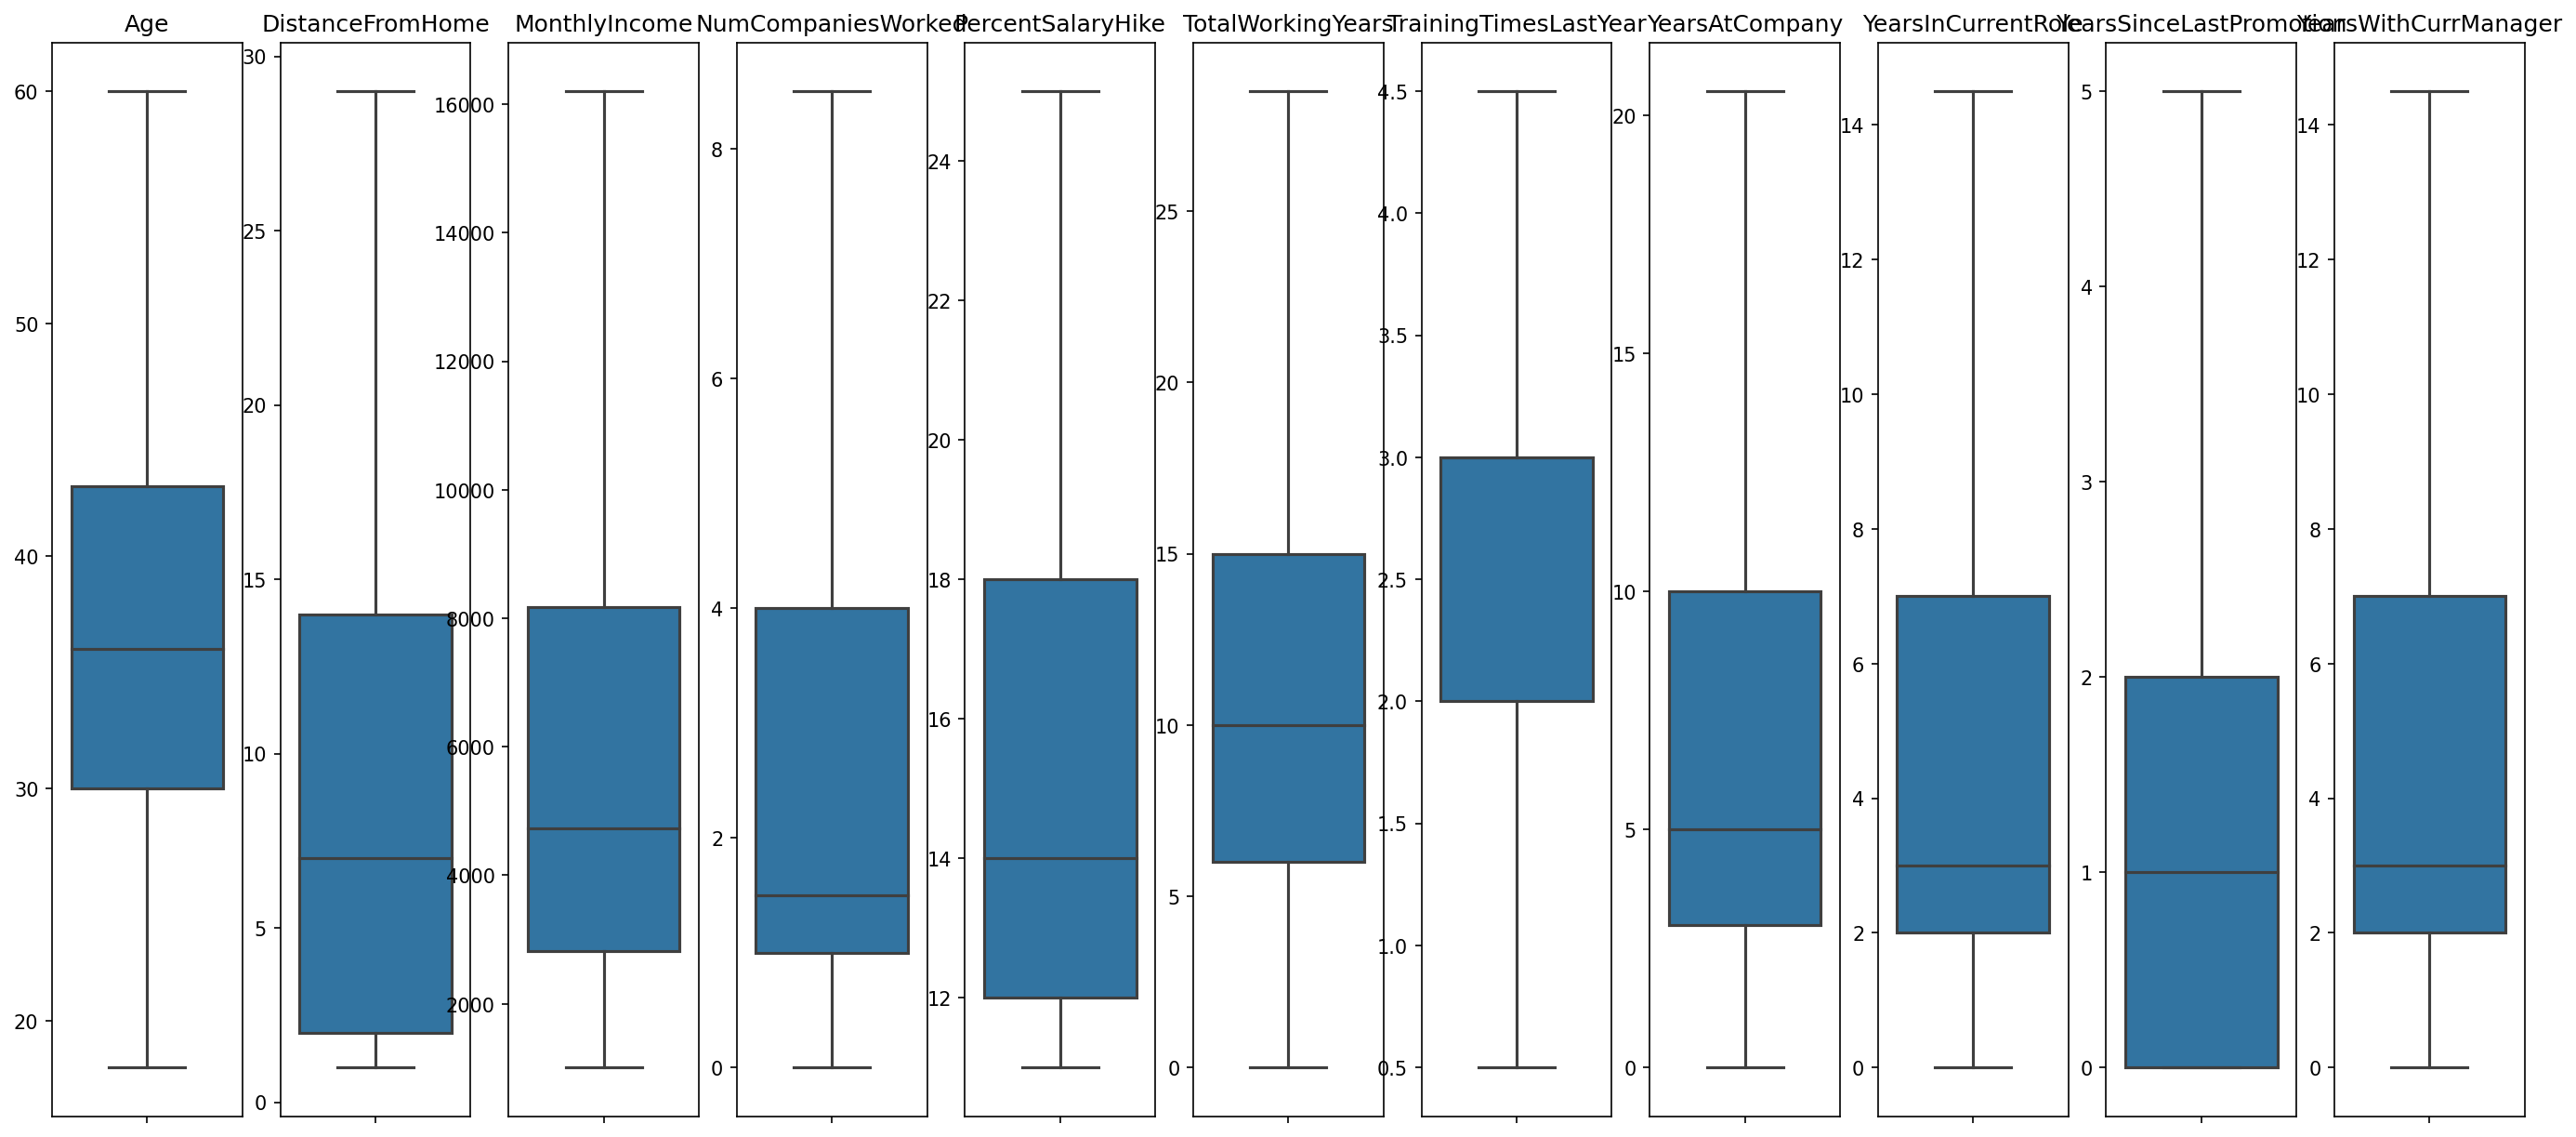

In [571]:
plt.figure(figsize=(25,10),dpi=150)
for i,var in enumerate(num_columns):
    plt.subplot(1,len(num_columns)+1,(i+1))
    ax=sns.boxplot(y=X_train_out_hand[var])
    ax.set(ylabel=None)
    ax.set(title=var)
#     plt.tight_layout

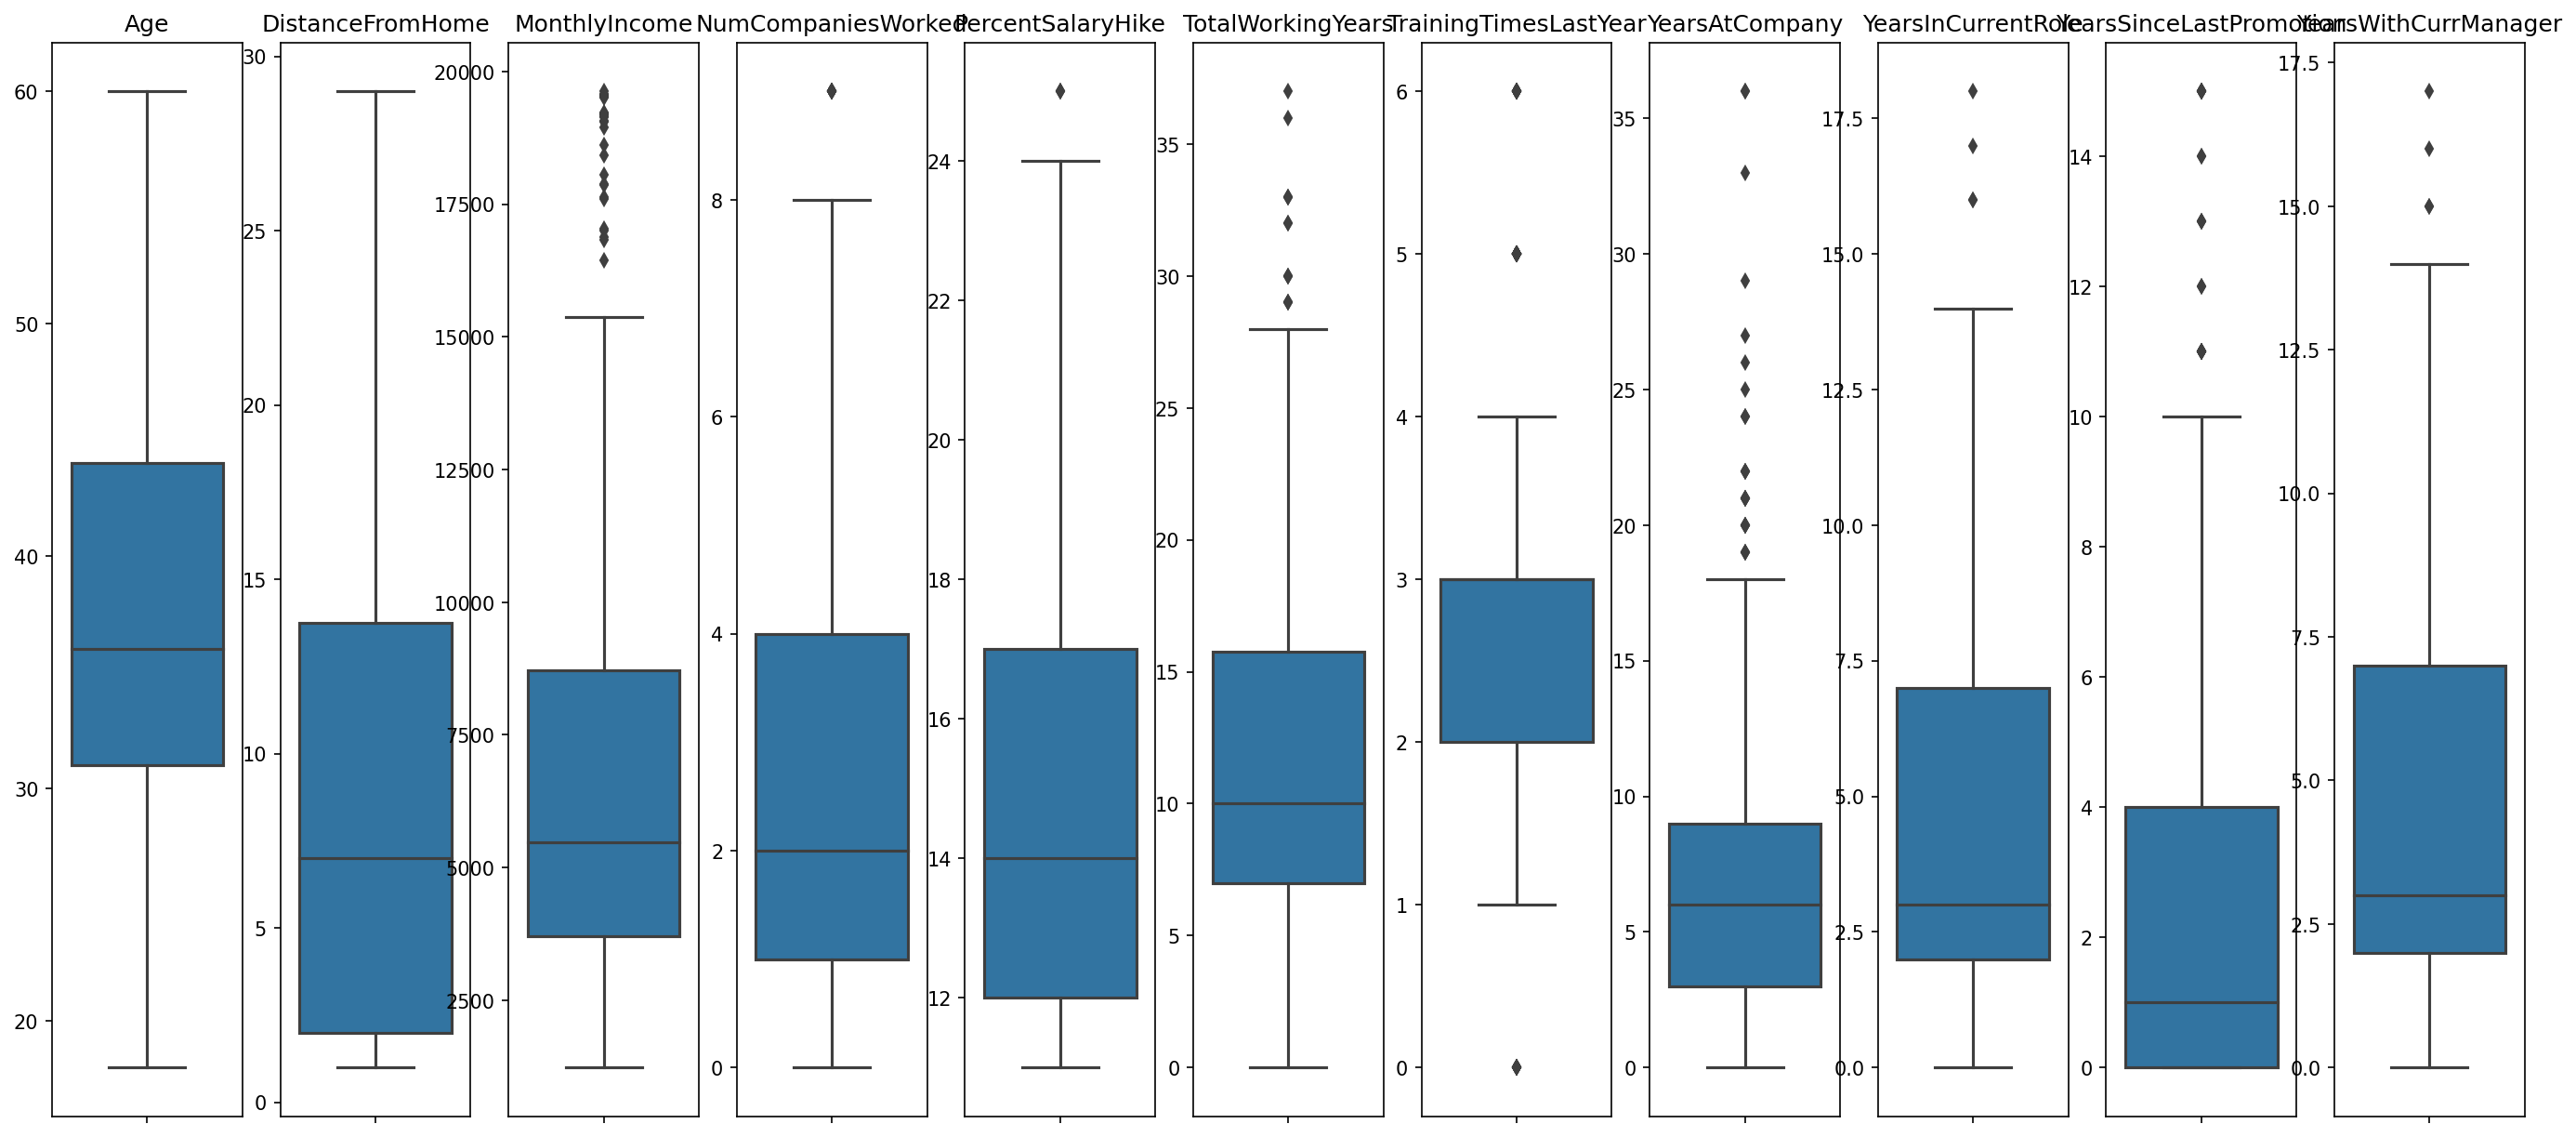

In [572]:
plt.figure(figsize=(25,10),dpi=150)
for i,var in enumerate(num_columns):
    plt.subplot(1,len(num_columns)+1,(i+1))
    ax=sns.boxplot(y=X_test_num[var])
    ax.set(ylabel=None)
    ax.set(title=var)
#     plt.tight_layout

In [573]:
X_test_out_hand = X_test_num.copy(deep=True)

for i in num_columns:
    X_test_out_hand[i] = np.where(X_test_out_hand[i]< outlier_handle(i)[0], outlier_handle(i)[0],
                          np.where(X_test_out_hand[i]> outlier_handle(i)[1], outlier_handle(i)[1],
                                   X_test_out_hand[i]))
                        
    

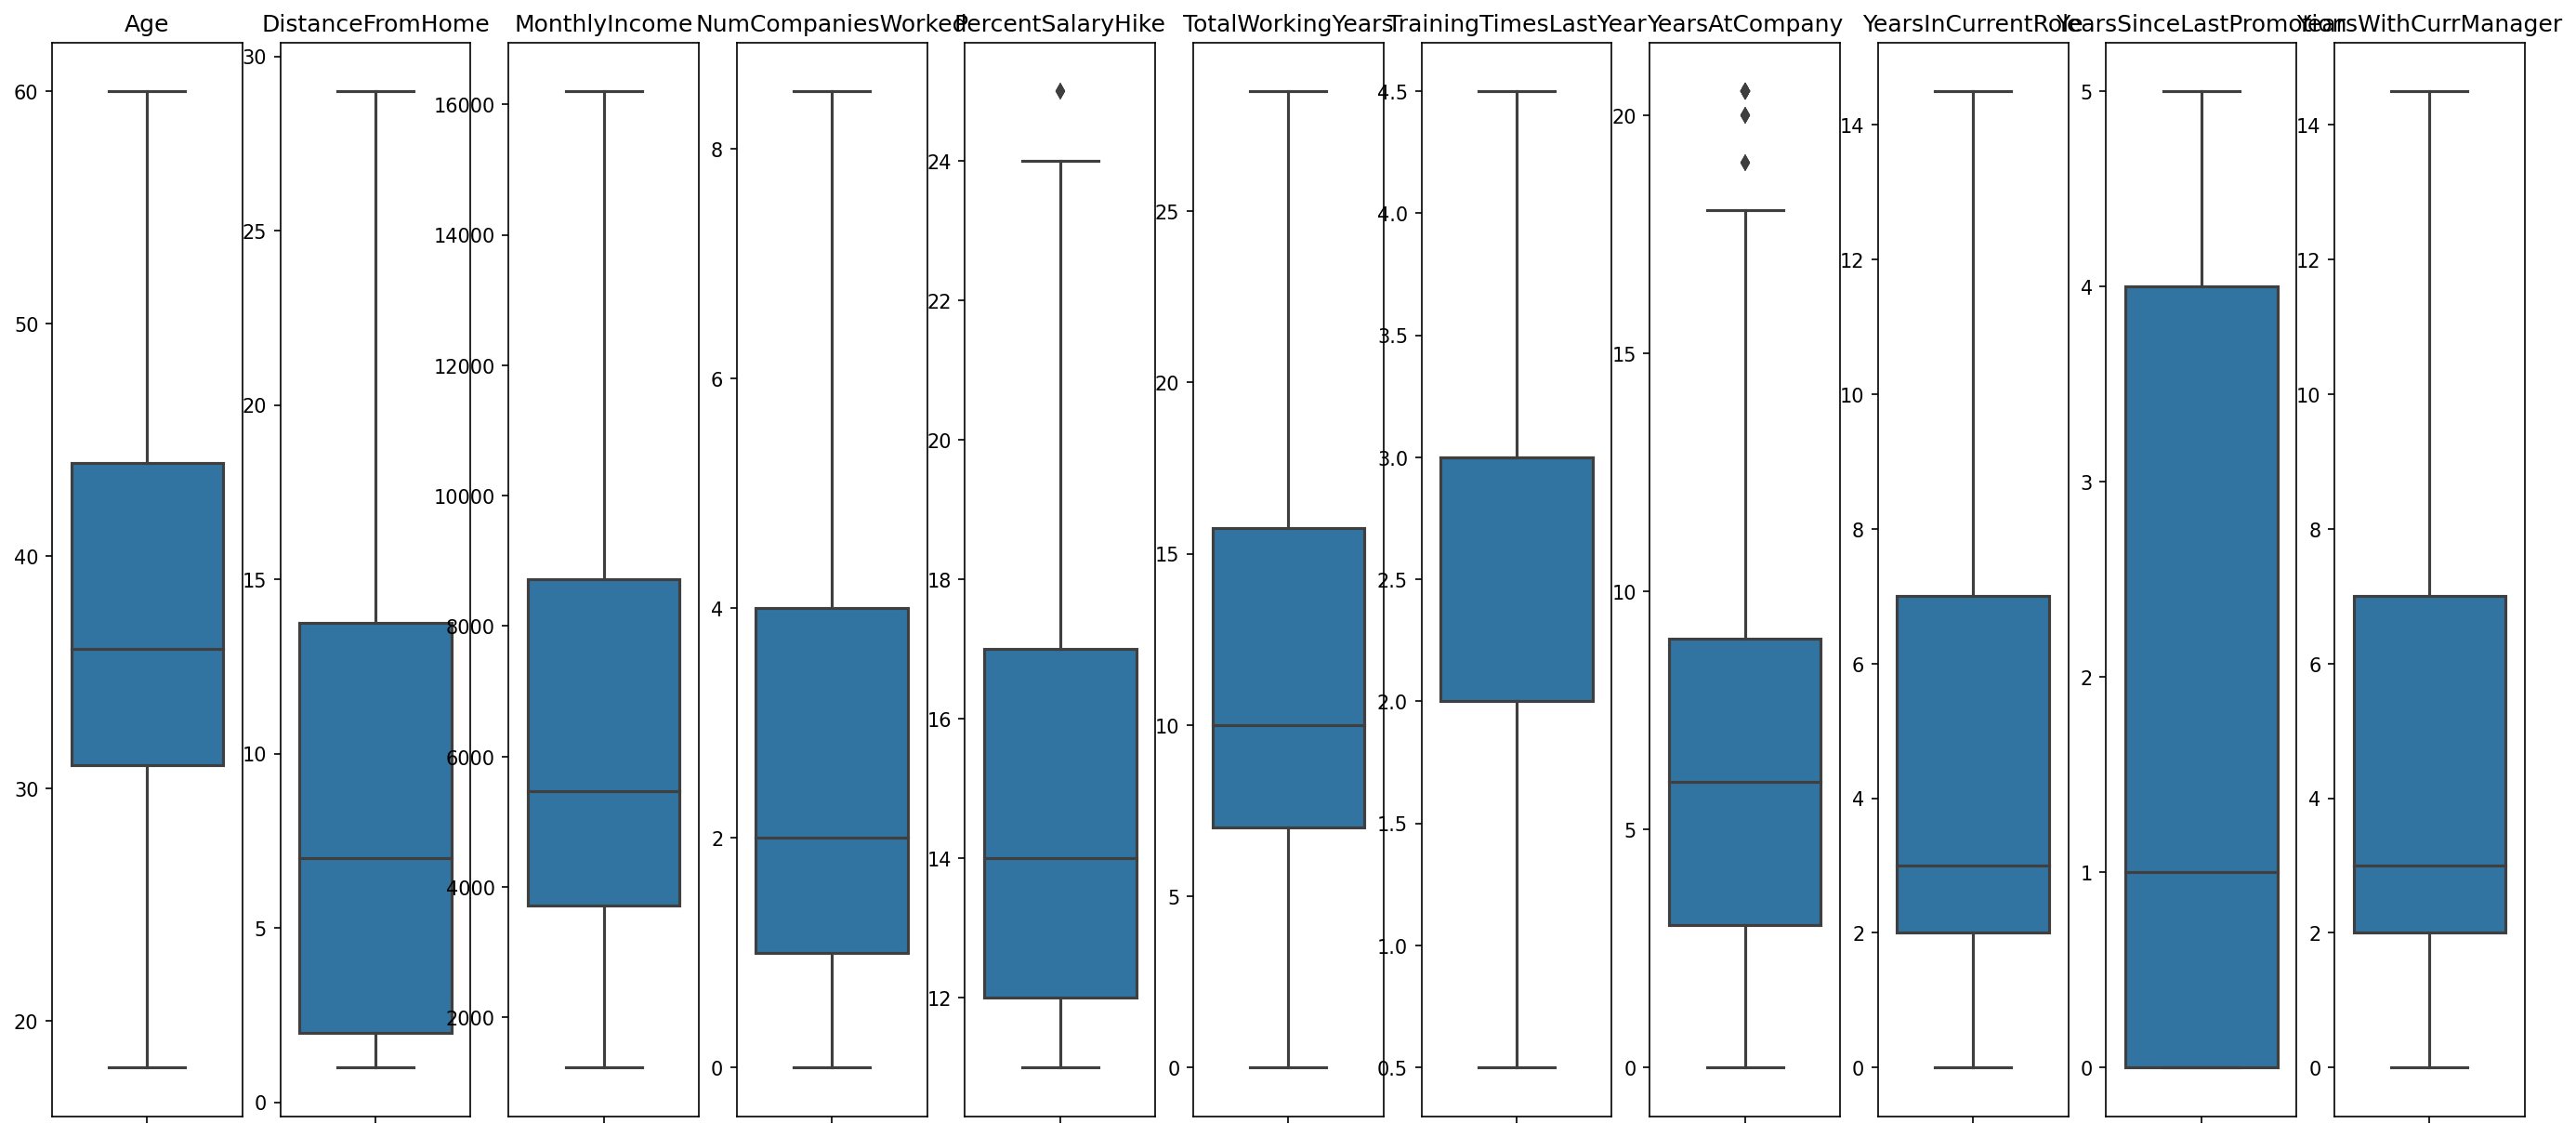

In [574]:
plt.figure(figsize=(25,10),dpi=150)
for i,var in enumerate(num_columns):
    plt.subplot(1,len(num_columns)+1,(i+1))
    ax=sns.boxplot(y=X_test_out_hand[var])
    ax.set(ylabel=None)
    ax.set(title=var)
#     plt.tight_layout

### 3. Standard Scalar

In [581]:
scaler = StandardScaler()

In [582]:
scaler.fit(X_train_out_hand)

StandardScaler()

In [583]:
X_train_scaled = scaler.transform(X_train_out_hand)
X_test_scaled = scaler.transform(X_test_out_hand)

In [585]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train_out_hand.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test_out_hand.columns)

In [586]:
X_train_scaled.describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03,1.176000e+03
mean,-1.450087e-16,9.063045e-17,9.365147e-17,5.135726e-17,7.552538e-17,-8.760944e-17,-6.268606e-17,2.265761e-18,1.299036e-16,8.458842e-17,-4.531523e-18
std,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00,1.000425e+00
min,-2.040738e+00,-1.013473e+00,-1.211200e+00,-1.071151e+00,-1.157903e+00,-1.496157e+00,-2.117333e+00,-1.251807e+00,-1.179435e+00,-8.557740e-01,-1.154733e+00
25%,-7.363811e-01,-8.907797e-01,-7.919325e-01,-6.640828e-01,-8.850185e-01,-6.751846e-01,-6.780362e-01,-6.918506e-01,-6.163517e-01,-8.557740e-01,-5.790796e-01
50%,-8.420273e-02,-2.773123e-01,-3.461738e-01,-4.605484e-01,-3.392493e-01,-1.278697e-01,2.814952e-01,-3.185465e-01,-3.348098e-01,-3.129530e-01,-2.912531e-01
75%,6.766720e-01,5.815421e-01,4.523927e-01,5.571234e-01,7.522889e-01,5.562740e-01,2.814952e-01,6.147137e-01,7.913577e-01,2.298681e-01,8.600532e-01
max,2.524511e+00,2.421944e+00,2.318880e+00,2.388933e+00,2.662481e+00,2.403462e+00,1.720792e+00,2.574560e+00,2.902922e+00,1.858331e+00,3.018752e+00


In [587]:
X_test_scaled.describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,0.081060,-0.041524,0.128078,0.089825,-0.045945,0.115304,0.020398,0.063011,0.026215,0.106164,0.137550
std,0.961562,0.972218,0.968670,0.992795,0.992816,0.991488,0.979354,1.006773,1.004608,1.051638,1.053654
min,-2.040738,-1.013473,-1.159380,-1.071151,-1.157903,-1.496157,-2.117333,-1.251807,-1.179435,-0.855774,-1.154733
25%,-0.627685,-0.890780,-0.582734,-0.664083,-0.885018,-0.538356,-0.678036,-0.691851,-0.616352,-0.855774,-0.579080
50%,-0.084203,-0.277312,-0.173517,-0.257014,-0.339249,-0.127870,0.281495,-0.131894,-0.334810,-0.312953,-0.291253
75%,0.785368,0.550869,0.579736,0.557123,0.479404,0.658896,0.281495,0.428062,0.791358,1.315510,0.860053
max,2.524511,2.421944,2.318880,2.388933,2.662481,2.403462,1.720792,2.574560,2.902922,1.858331,3.018752


### 4. One-Hot Encode Categorical Variables

In [593]:
X_train_cat = X_train[cat_columns] 
X_test_cat = X_test[cat_columns]

In [595]:
ohe_transform = OneHotEncoder(categories='auto',drop=None,
                             sparse_output=False,
                              handle_unknown='error')

In [596]:
ohe_transform.fit(X_train_cat.fillna('Not Present'))

OneHotEncoder(sparse_output=False)

In [599]:
ohe_transform.categories_

[array(['Human Resources', 'Research & Development', 'Sales'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Y'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array([1, 2, 3, 4, 5], dtype=int64),
 array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object),
 array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array([1, 2, 3, 4, 5], dtype=int64),
 array(['Healthcare Representative', 'Human Resources',
        'Laboratory Technician', 'Manager', 'Manufacturing Director',
        'Research Director', 'Research Scientist', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array([1, 2, 3, 4], dtype=int64),
 array([1, 2, 3, 4], dtype=int64),
 array([1, 2, 3, 4], dtype=int64),
 array([3, 4], dtype=int64),
 array([1, 2, 3, 4], dtype=int64),
 array([0, 1, 2, 3], dtype=int64),
 array([1, 2, 3, 4], dtype=int64)]

In [602]:
feature_names = ohe_transform.get_feature_names_out()

In [609]:
X_train_cat_ohe =  ohe_transform.transform(X_train_cat.fillna('Not Present'))
X_test_cat_ohe = ohe_transform.transform(X_test_cat.fillna('Not Present'))

In [611]:
X_test_cat_ohe.shape

(294, 63)

In [613]:
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe,columns=feature_names)
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe,columns=feature_names)

In [615]:
X_train_cat_ohe.describe()

,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,Gender_Female,Gender_Male,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,0.042517,0.650510,0.306973,0.227041,0.467687,0.305272,1.0,0.398810,0.601190,0.125850,0.186224,0.386054,0.269558,0.032313,0.018707,0.417517,0.105442,0.313776,0.058673,0.085884,0.096088,0.193878,0.710034,0.391156,0.349490,0.142857,0.073129,0.043367,0.089286,0.035714,0.173469,0.067177,0.090986,0.057823,0.205782,0.215986,0.063776,0.194728,0.206633,0.306973,0.291667,0.057823,0.258503,0.587585,0.096088,0.189626,0.199830,0.295918,0.314626,0.844388,0.155612,0.191327,0.211735,0.311224,0.285714,0.419218,0.410714,0.108844,0.061224,0.051871,0.240646,0.611395,0.096088
std,0.201851,0.477012,0.461434,0.419097,0.499167,0.460719,0.0,0.489862,0.489862,0.331822,0.389453,0.487050,0.443919,0.176905,0.135548,0.493359,0.307253,0.464224,0.235113,0.280312,0.294838,0.395502,0.453939,0.488217,0.477012,0.350076,0.260459,0.203769,0.285277,0.185656,0.378814,0.250435,0.287712,0.233508,0.404444,0.411680,0.244457,0.396160,0.405062,0.461434,0.454723,0.233508,0.437998,0.492479,0.294838,0.392172,0.400043,0.456649,0.464564,0.362642,0.362642,0.393513,0.408712,0.463191,0.451946,0.493641,0.492173,0.311575,0.239844,0.221860,0.427658,0.487641,0.294838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [616]:
X_test_cat_ohe.describe()

,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,Gender_Female,Gender_Male,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.0,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.00000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,0.044218,0.666667,0.289116,0.204082,0.418367,0.377551,1.0,0.404762,0.595238,0.074830,0.214286,0.401361,0.275510,0.034014,0.017007,0.391156,0.119048,0.323129,0.044218,0.105442,0.125850,0.166667,0.707483,0.282313,0.418367,0.170068,0.068027,0.061224,0.088435,0.034014,0.187075,0.078231,0.129252,0.040816,0.170068,0.244898,0.027211,0.187075,0.149660,0.312925,0.35034,0.051020,0.241497,0.602041,0.105442,0.224490,0.153061,0.319728,0.302721,0.853741,0.146259,0.173469,0.183673,0.316327,0.326531,0.469388,0.384354,0.102041,0.044218,0.064626,0.207483,0.591837,0.136054
std,0.205929,0.472208,0.454125,0.403716,0.494132,0.485601,0.0,0.491683,0.491683,0.263565,0.411026,0.491009,0.447533,0.181573,0.129517,0.488841,0.324397,0.468469,0.205929,0.307646,0.332246,0.373313,0.455694,0.450892,0.494132,0.376333,0.252222,0.240150,0.284411,0.181573,0.390636,0.268993,0.336050,0.198202,0.376333,0.430760,0.162975,0.390636,0.357346,0.464475,0.47789,0.220415,0.428720,0.490312,0.307646,0.417957,0.360660,0.467166,0.460219,0.353968,0.353968,0.379298,0.387878,0.465835,0.469743,0.499913,0.487272,0.303218,0.205929,0.246284,0.406196,0.492332,0.343431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [621]:
y_test

1041     No
184      No
1222    Yes
67       No
220      No
       ... 
567      No
560      No
945      No
522      No
651      No
Name: Attrition, Length: 294, dtype: object

In [539]:
ohe_transform = OneHotEncoder(categories='auto',drop=None,
                             sparse_output=False,
                              handle_unknown='error')

In [541]:
ohe_transform.fit(y_train.to_frame().fillna('Not Present'))

OneHotEncoder(sparse_output=False)

In [543]:
ohe_transform.get_feature_names_out()

array(['Attrition_No', 'Attrition_Yes'], dtype=object)

In [545]:
y_train = ohe_transform.transform(y_train.to_frame().fillna('Not Present'))

In [547]:
y_test = ohe_transform.transform(y_test.to_frame().fillna('Not Present'))

In [549]:
y_test

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [424]:
y_train = y_train[:,0]
y_test = y_test[:,0]

In [425]:
y_test

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1.

### 4. Join num and Cat variables

In [140]:
# num dataframes
X_train_scaled
X_test_scaled.head(3)

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.953774,-0.522699,0.520944,-1.071151,0.752289,-0.675185,1.241027,-0.318546,-0.053268,-0.312953,-0.291253
1,1.763636,0.458849,-0.411588,-0.664083,-1.157903,-0.812013,0.281495,-0.505199,-0.616352,-0.312953,-0.291253
2,-1.388559,1.563090,-1.084322,-0.664083,-1.157903,-1.359328,-0.678036,-1.065155,-1.179435,-0.855774,-1.154733


In [141]:
# cat dataframes
X_train_cat_ohe
X_test_cat_ohe.head(3)

,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,Gender_Female,Gender_Male,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [142]:
X_train_final = X_train_scaled.join(X_train_cat_ohe)

In [143]:
X_test_final = X_test_scaled.join(X_test_cat_ohe)

In [144]:
X_train_final.head(3)

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,Gender_Female,Gender_Male,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,-1.388559,1.440396,-0.912130,-1.071151,-0.339249,-1.222500,0.281495,-1.065155,-0.897894,-0.855774,-1.154733,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-2.040738,-0.522699,-1.201440,-0.664083,-0.066365,-1.496157,-0.678036,-1.251807,-1.179435,-0.855774,-1.154733,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.845077,1.317703,0.164941,-0.257014,-0.339249,-0.127870,-0.678036,-0.691851,-0.616352,-0.855774,-0.579080,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [145]:
X_test_final.head(3)

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,Gender_Female,Gender_Male,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,-0.953774,-0.522699,0.520944,-1.071151,0.752289,-0.675185,1.241027,-0.318546,-0.053268,-0.312953,-0.291253,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.763636,0.458849,-0.411588,-0.664083,-1.157903,-0.812013,0.281495,-0.505199,-0.616352,-0.312953,-0.291253,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-1.388559,1.563090,-1.084322,-0.664083,-1.157903,-1.359328,-0.678036,-1.065155,-1.179435,-0.855774,-1.154733,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Define Evaluation Metrics

In [148]:
# 1- classification_report,
# 2- confusion_matrix
# 3- ConfusionMatrixDisplay
# 4- roc_curve
# 5- roc_auc_score
# 6- precision_score
# 7- recall_score
# 8- accuracy_score
# 9- f1_score

In [149]:
train_perf_classifier = pd.DataFrame(index= ['Accuracy','AUC_ROC','PrecisionScore','RecallScore','F1_Score'], 
                                 columns= ['Logistic Reg','KNN','SVM','Decision Tree','Random Forest','AdaBoost','Gradient Boost','XGBoost','LightGBM'])

test_perf_classifier = pd.DataFrame(index=['Accuracy','AUC_ROC','PrecisionScore','RecallScore','F1_Score'], 
                                 columns=['Logistic Reg','KNN','SVM','Decision Tree','Random Forest','AdaBoost','Gradient Boost','XGBoost','LightGBM'])    

In [150]:
def eval_metrics(y_test,y_pred):
    Accuracy = np.round(accuracy_score(y_test,y_pred),3)
    AUC_ROC = np.round(roc_auc_score(y_test,y_pred),3)
    PrecisionScore = np.round(precision_score(y_test,y_pred),3)
    RecallScore = np.round(recall_score(y_test,y_pred),3)
    F1_Score = np.round(f1_score(y_test,y_pred),3)
    return ((Accuracy,AUC_ROC,PrecisionScore,RecallScore,F1_Score))

## Algorithms

### 1. KNN

In [154]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [155]:
knn_model.fit(X_train_final,y_train)

KNeighborsClassifier()

In [156]:
y_fit = knn_model.predict(X_train_final)
y_pred = knn_model.predict(X_test_final)

In [157]:
train_perf_classifier['KNN'] =  eval_metrics(y_train,y_fit)
test_perf_classifier['KNN'] = eval_metrics(y_test,y_pred)

In [158]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,NaN,0.860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC_ROC,NaN,0.622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrecisionScore,NaN,0.868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RecallScore,NaN,0.981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1_Score,NaN,0.921,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,NaN,0.847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC_ROC,NaN,0.521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrecisionScore,NaN,0.872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RecallScore,NaN,0.965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1_Score,NaN,0.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.25      0.08      0.12        39
         1.0       0.87      0.96      0.92       255

    accuracy                           0.85       294
   macro avg       0.56      0.52      0.52       294
weighted avg       0.79      0.85      0.81       294



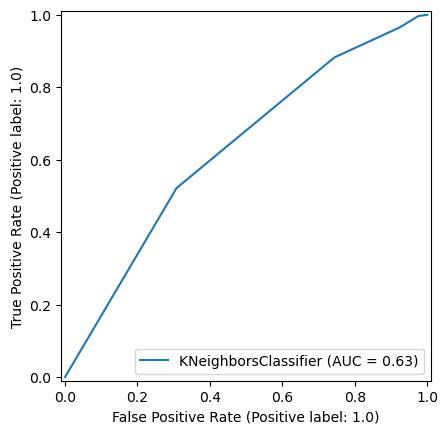

In [161]:
RocCurveDisplay.from_estimator(knn_model,X_test_final,y_test)

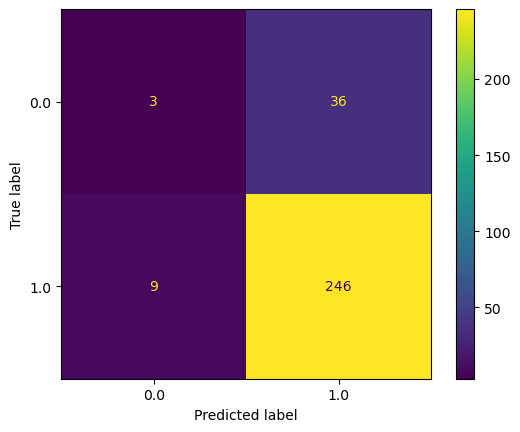

In [162]:
ConfusionMatrixDisplay.from_estimator(knn_model,X_test_final,y_test)

### 2. Logistic Regression

In [166]:
log_model = LogisticRegression()

In [167]:
log_model.fit(X_train_final,y_train)

LogisticRegression()

In [168]:
y_fit = log_model.predict(X_train_final)
y_pred = log_model.predict(X_test_final)

In [169]:
train_perf_classifier['Logistic Reg'] =  eval_metrics(y_train,y_fit)
test_perf_classifier['Logistic Reg'] = eval_metrics(y_test,y_pred)

In [170]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC_ROC,0.661,0.622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrecisionScore,0.881,0.868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RecallScore,0.973,0.981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1_Score,0.925,0.921,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC_ROC,0.645,0.521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrecisionScore,0.904,0.872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RecallScore,0.957,0.965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1_Score,0.930,0.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.54      0.33      0.41        39
         1.0       0.90      0.96      0.93       255

    accuracy                           0.87       294
   macro avg       0.72      0.65      0.67       294
weighted avg       0.86      0.87      0.86       294



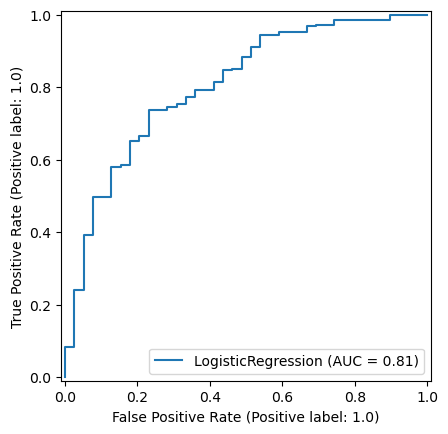

In [173]:
RocCurveDisplay.from_estimator(log_model,X_test_final,y_test)

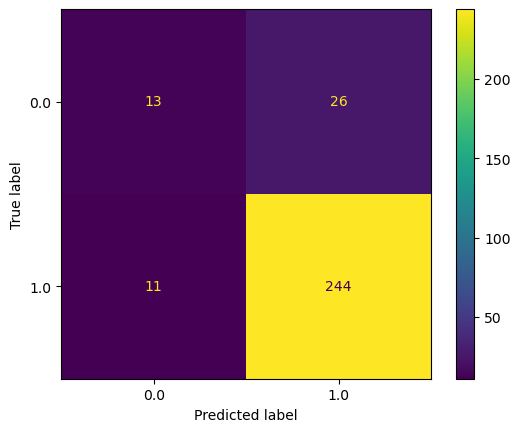

In [174]:
ConfusionMatrixDisplay.from_estimator(log_model,X_test_final,y_test)

### 3. SVM

In [178]:
svm = SVC(kernel='rbf')

In [179]:
svm.fit(X_train_final,y_train)

SVC()

In [180]:
y_fit = svm.predict(X_train_final)
y_pred = svm.predict(X_test_final)

In [181]:
train_perf_classifier['SVM'] = eval_metrics(y_train,y_fit)
test_perf_classifier['SVM'] = eval_metrics(y_test,y_pred)

In [182]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,0.883,NaN,NaN,NaN,NaN,NaN,NaN
AUC_ROC,0.661,0.622,0.654,NaN,NaN,NaN,NaN,NaN,NaN
PrecisionScore,0.881,0.868,0.877,NaN,NaN,NaN,NaN,NaN,NaN
RecallScore,0.973,0.981,0.999,NaN,NaN,NaN,NaN,NaN,NaN
F1_Score,0.925,0.921,0.934,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,0.888,NaN,NaN,NaN,NaN,NaN,NaN
AUC_ROC,0.645,0.521,0.577,NaN,NaN,NaN,NaN,NaN,NaN
PrecisionScore,0.904,0.872,0.885,NaN,NaN,NaN,NaN,NaN,NaN
RecallScore,0.957,0.965,1.000,NaN,NaN,NaN,NaN,NaN,NaN
F1_Score,0.930,0.916,0.939,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.15      0.27        39
         1.0       0.89      1.00      0.94       255

    accuracy                           0.89       294
   macro avg       0.94      0.58      0.60       294
weighted avg       0.90      0.89      0.85       294



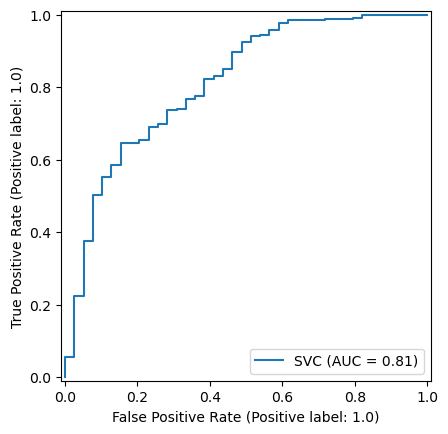

In [185]:
RocCurveDisplay.from_estimator(svm,X_test_final,y_test)

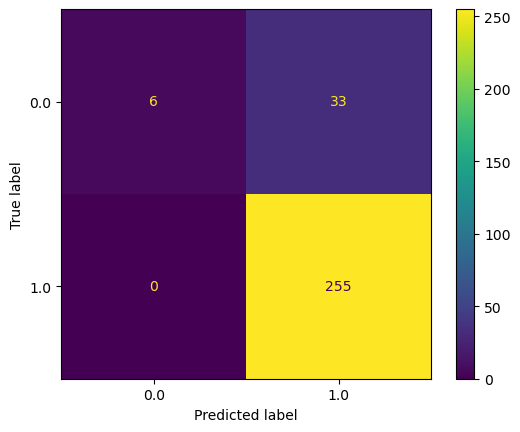

In [186]:
ConfusionMatrixDisplay.from_estimator(svm,X_test_final,y_test)

### 4. Decision Tree

In [190]:
dtc = DecisionTreeClassifier()

In [191]:
dtc.fit(X_train_final,y_train)

DecisionTreeClassifier()

In [192]:
y_fit = dtc.predict(X_train_final)
y_pred = dtc.predict(X_test_final)

In [193]:
train_perf_classifier['Decision Tree'] = eval_metrics(y_train,y_fit) 
test_perf_classifier['Decision Tree'] = eval_metrics(y_test,y_pred)

In [194]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,0.883,1.0,NaN,NaN,NaN,NaN,NaN
AUC_ROC,0.661,0.622,0.654,1.0,NaN,NaN,NaN,NaN,NaN
PrecisionScore,0.881,0.868,0.877,1.0,NaN,NaN,NaN,NaN,NaN
RecallScore,0.973,0.981,0.999,1.0,NaN,NaN,NaN,NaN,NaN
F1_Score,0.925,0.921,0.934,1.0,NaN,NaN,NaN,NaN,NaN


In [195]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,0.888,0.769,NaN,NaN,NaN,NaN,NaN
AUC_ROC,0.645,0.521,0.577,0.563,NaN,NaN,NaN,NaN,NaN
PrecisionScore,0.904,0.872,0.885,0.885,NaN,NaN,NaN,NaN,NaN
RecallScore,0.957,0.965,1.000,0.843,NaN,NaN,NaN,NaN,NaN
F1_Score,0.930,0.916,0.939,0.863,NaN,NaN,NaN,NaN,NaN


In [196]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.22      0.28      0.24        39
         1.0       0.88      0.84      0.86       255

    accuracy                           0.77       294
   macro avg       0.55      0.56      0.55       294
weighted avg       0.80      0.77      0.78       294



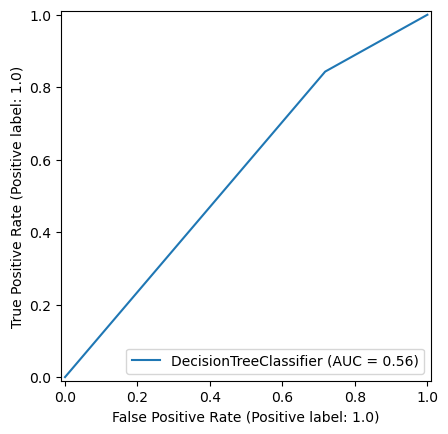

In [197]:
RocCurveDisplay.from_estimator(dtc,X_test_final,y_test)

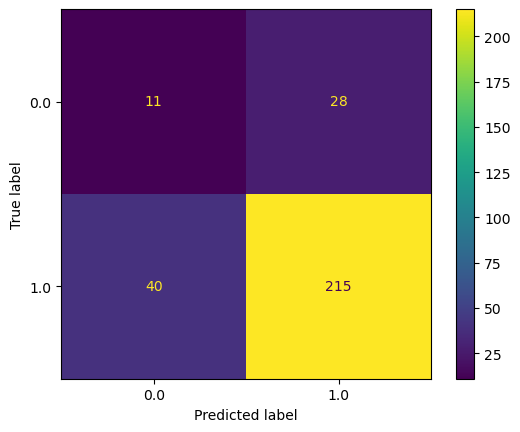

In [198]:
ConfusionMatrixDisplay.from_estimator(dtc,X_test_final,y_test)

### 5. Random Forest

In [202]:
rfc = RandomForestClassifier()

In [203]:
rfc.fit(X_train_final,y_train)

RandomForestClassifier()

In [204]:
y_fit = rfc.predict(X_train_final)
y_pred = rfc.predict(X_test_final)

In [205]:
train_perf_classifier['Random Forest'] = eval_metrics(y_train,y_fit)
test_perf_classifier['Random Forest'] = eval_metrics(y_test,y_pred)

In [206]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,0.883,1.0,1.0,NaN,NaN,NaN,NaN
AUC_ROC,0.661,0.622,0.654,1.0,1.0,NaN,NaN,NaN,NaN
PrecisionScore,0.881,0.868,0.877,1.0,1.0,NaN,NaN,NaN,NaN
RecallScore,0.973,0.981,0.999,1.0,1.0,NaN,NaN,NaN,NaN
F1_Score,0.925,0.921,0.934,1.0,1.0,NaN,NaN,NaN,NaN


In [207]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,0.888,0.769,0.878,NaN,NaN,NaN,NaN
AUC_ROC,0.645,0.521,0.577,0.563,0.538,NaN,NaN,NaN,NaN
PrecisionScore,0.904,0.872,0.885,0.885,0.876,NaN,NaN,NaN,NaN
RecallScore,0.957,0.965,1.000,0.843,1.000,NaN,NaN,NaN,NaN
F1_Score,0.930,0.916,0.939,0.863,0.934,NaN,NaN,NaN,NaN


In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.08      0.14        39
         1.0       0.88      1.00      0.93       255

    accuracy                           0.88       294
   macro avg       0.94      0.54      0.54       294
weighted avg       0.89      0.88      0.83       294



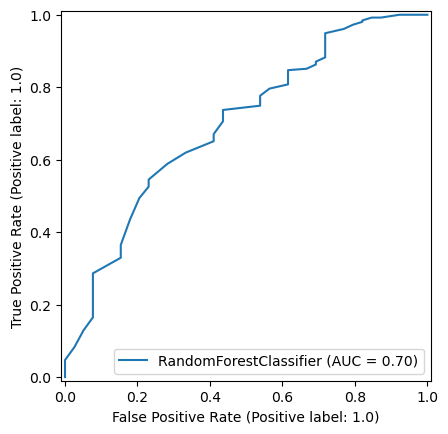

In [209]:
RocCurveDisplay.from_estimator(rfc,X_test_final,y_test)

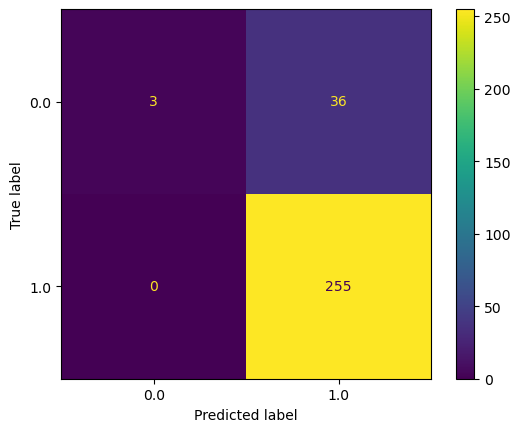

In [210]:
ConfusionMatrixDisplay.from_estimator(rfc,X_test_final,y_test)

### 6. AdaBoost

In [214]:
adaboost = AdaBoostClassifier()

In [215]:
adaboost.fit(X_train_final,y_train)

C:\Users\kharb\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [216]:
y_fit = adaboost.predict(X_train_final)
y_pred = adaboost.predict(X_test_final)

In [217]:
train_perf_classifier['AdaBoost'] = eval_metrics(y_train,y_fit)
test_perf_classifier['AdaBoost'] = eval_metrics(y_test,y_pred)

In [218]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,0.883,1.0,1.0,0.884,NaN,NaN,NaN
AUC_ROC,0.661,0.622,0.654,1.0,1.0,0.713,NaN,NaN,NaN
PrecisionScore,0.881,0.868,0.877,1.0,1.0,0.898,NaN,NaN,NaN
RecallScore,0.973,0.981,0.999,1.0,1.0,0.971,NaN,NaN,NaN
F1_Score,0.925,0.921,0.934,1.0,1.0,0.933,NaN,NaN,NaN


In [219]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,0.888,0.769,0.878,0.864,NaN,NaN,NaN
AUC_ROC,0.645,0.521,0.577,0.563,0.538,0.628,NaN,NaN,NaN
PrecisionScore,0.904,0.872,0.885,0.885,0.876,0.900,NaN,NaN,NaN
RecallScore,0.957,0.965,1.000,0.843,1.000,0.949,NaN,NaN,NaN
F1_Score,0.930,0.916,0.939,0.863,0.934,0.924,NaN,NaN,NaN


In [220]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.48      0.31      0.38        39
         1.0       0.90      0.95      0.92       255

    accuracy                           0.86       294
   macro avg       0.69      0.63      0.65       294
weighted avg       0.84      0.86      0.85       294



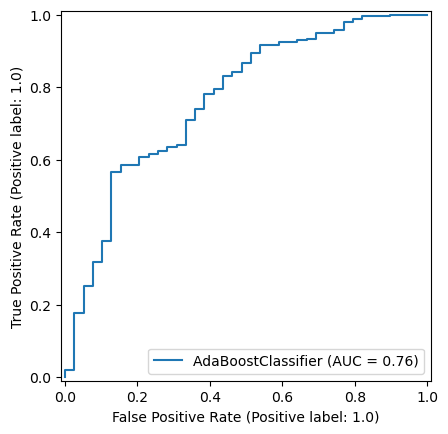

In [221]:
RocCurveDisplay.from_estimator(adaboost,X_test_final,y_test)

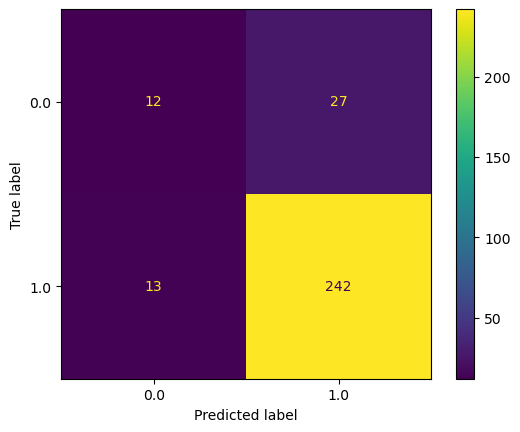

In [222]:
ConfusionMatrixDisplay.from_estimator(adaboost,X_test_final,y_test)

### 7. Gradient Boost

In [226]:
gradientboost = GradientBoostingClassifier()

In [227]:
gradientboost.fit(X_train_final,y_train)

GradientBoostingClassifier()

In [228]:
y_fit = gradientboost.predict(X_train_final)
y_pred = gradientboost.predict(X_test_final)

In [229]:
train_perf_classifier['Gradient Boost'] = eval_metrics(y_train,y_fit)
test_perf_classifier['Gradient Boost'] = eval_metrics(y_test,y_pred)

In [230]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,0.883,1.0,1.0,0.884,0.935,NaN,NaN
AUC_ROC,0.661,0.622,0.654,1.0,1.0,0.713,0.812,NaN,NaN
PrecisionScore,0.881,0.868,0.877,1.0,1.0,0.898,0.930,NaN,NaN
RecallScore,0.973,0.981,0.999,1.0,1.0,0.971,0.998,NaN,NaN
F1_Score,0.925,0.921,0.934,1.0,1.0,0.933,0.963,NaN,NaN


In [231]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,0.888,0.769,0.878,0.864,0.878,NaN,NaN
AUC_ROC,0.645,0.521,0.577,0.563,0.538,0.628,0.604,NaN,NaN
PrecisionScore,0.904,0.872,0.885,0.885,0.876,0.900,0.892,NaN,NaN
RecallScore,0.957,0.965,1.000,0.843,1.000,0.949,0.976,NaN,NaN
F1_Score,0.930,0.916,0.939,0.863,0.934,0.924,0.933,NaN,NaN


In [232]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.23      0.33        39
         1.0       0.89      0.98      0.93       255

    accuracy                           0.88       294
   macro avg       0.75      0.60      0.63       294
weighted avg       0.85      0.88      0.85       294



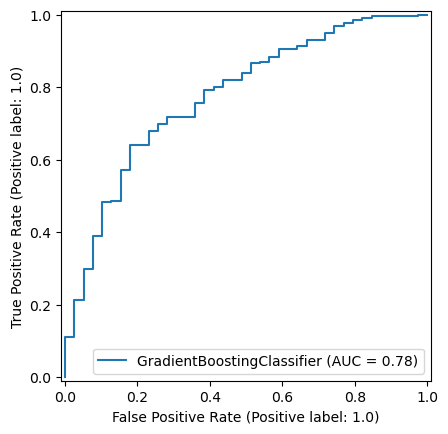

In [233]:
RocCurveDisplay.from_estimator(gradientboost,X_test_final,y_test)

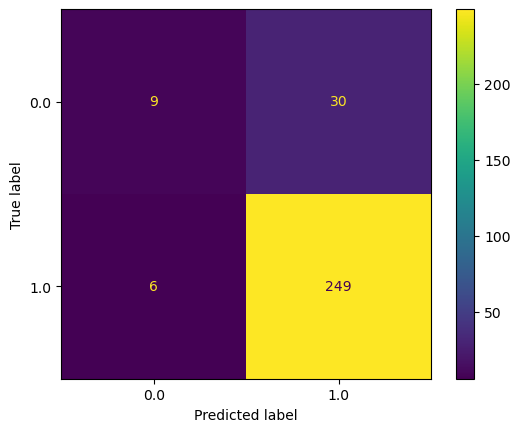

In [234]:
ConfusionMatrixDisplay.from_estimator(gradientboost,X_test_final,y_test)

### 8. XGBoost

In [238]:
from xgboost import XGBClassifier

In [239]:
xgb = XGBClassifier()

In [240]:
xgb.fit(X_train_final,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [241]:
y_fit = xgb.predict(X_train_final)
y_predict = xgb.predict(X_test_final)

In [242]:
train_perf_classifier['XGBoost'] = eval_metrics(y_train,y_fit)
test_perf_classifier['XGBoost'] = eval_metrics(y_test,y_pred)

In [243]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,0.883,1.0,1.0,0.884,0.935,1.0,NaN
AUC_ROC,0.661,0.622,0.654,1.0,1.0,0.713,0.812,1.0,NaN
PrecisionScore,0.881,0.868,0.877,1.0,1.0,0.898,0.930,1.0,NaN
RecallScore,0.973,0.981,0.999,1.0,1.0,0.971,0.998,1.0,NaN
F1_Score,0.925,0.921,0.934,1.0,1.0,0.933,0.963,1.0,NaN


In [244]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,0.888,0.769,0.878,0.864,0.878,0.878,NaN
AUC_ROC,0.645,0.521,0.577,0.563,0.538,0.628,0.604,0.604,NaN
PrecisionScore,0.904,0.872,0.885,0.885,0.876,0.900,0.892,0.892,NaN
RecallScore,0.957,0.965,1.000,0.843,1.000,0.949,0.976,0.976,NaN
F1_Score,0.930,0.916,0.939,0.863,0.934,0.924,0.933,0.933,NaN


In [245]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.23      0.33        39
         1.0       0.89      0.98      0.93       255

    accuracy                           0.88       294
   macro avg       0.75      0.60      0.63       294
weighted avg       0.85      0.88      0.85       294



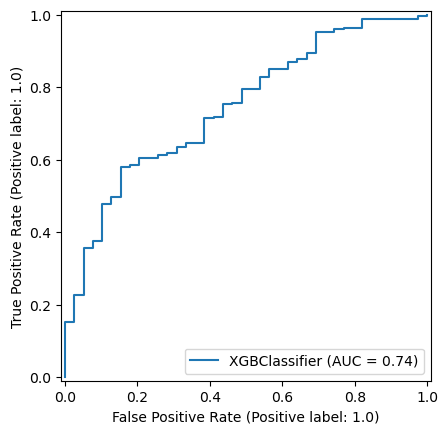

In [246]:
RocCurveDisplay.from_estimator(xgb,X_test_final,y_test)

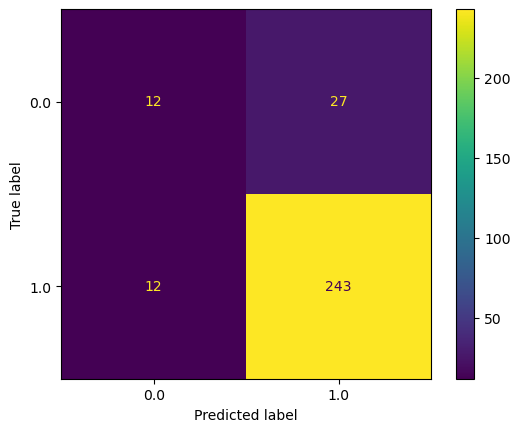

In [247]:
ConfusionMatrixDisplay.from_estimator(xgb,X_test_final,y_test)

### 9. LightGBM

In [251]:
from lightgbm import LGBMClassifier

In [252]:
lgb = LGBMClassifier()

In [253]:
lgb.fit(X_train_final,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 978, number of negative: 198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.831633 -> initscore=1.597243
[LightGBM] [Info] Start training from score 1.597243


LGBMClassifier()

In [254]:
y_fit = lgb.predict(X_train_final)
y_pred = lgb.predict(X_test_final)

In [255]:
train_perf_classifier['LightGBM'] = eval_metrics(y_train,y_fit)
test_perf_classifier['LightGBM'] = eval_metrics(y_test,y_pred)

In [256]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,0.883,1.0,1.0,0.884,0.935,1.0,1.0
AUC_ROC,0.661,0.622,0.654,1.0,1.0,0.713,0.812,1.0,1.0
PrecisionScore,0.881,0.868,0.877,1.0,1.0,0.898,0.930,1.0,1.0
RecallScore,0.973,0.981,0.999,1.0,1.0,0.971,0.998,1.0,1.0
F1_Score,0.925,0.921,0.934,1.0,1.0,0.933,0.963,1.0,1.0


In [257]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,0.888,0.769,0.878,0.864,0.878,0.878,0.871
AUC_ROC,0.645,0.521,0.577,0.563,0.538,0.628,0.604,0.604,0.589
PrecisionScore,0.904,0.872,0.885,0.885,0.876,0.900,0.892,0.892,0.889
RecallScore,0.957,0.965,1.000,0.843,1.000,0.949,0.976,0.976,0.973
F1_Score,0.930,0.916,0.939,0.863,0.934,0.924,0.933,0.933,0.929


In [258]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.53      0.21      0.30        39
         1.0       0.89      0.97      0.93       255

    accuracy                           0.87       294
   macro avg       0.71      0.59      0.61       294
weighted avg       0.84      0.87      0.84       294



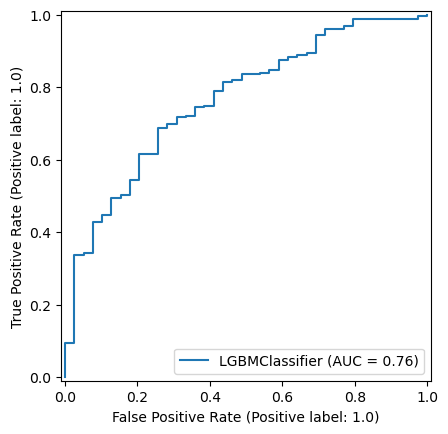

In [259]:
RocCurveDisplay.from_estimator(lgb,X_test_final,y_test)

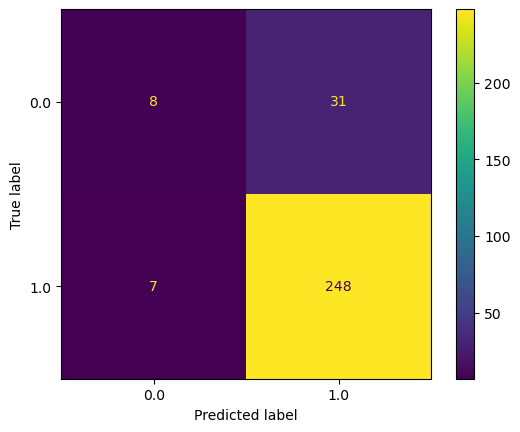

In [260]:
ConfusionMatrixDisplay.from_estimator(lgb,X_test_final,y_test)

## HyperParameter Tuning - XGBoost

In [264]:
import random

In [265]:
iterations = ['XGB1','XGB2','XGB3','XGB4']
eval_metrics2 = ['Accuracy','AUC_ROC','PrecisionScore','RecallScore','F1_Score']

In [266]:
train_tuning_df = pd.DataFrame(columns = iterations, index = eval_metrics2)
test_tuning_df = pd.DataFrame(columns = iterations, index = eval_metrics2)

In [267]:
train_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,NaN,NaN,NaN,NaN
AUC_ROC,NaN,NaN,NaN,NaN
PrecisionScore,NaN,NaN,NaN,NaN
RecallScore,NaN,NaN,NaN,NaN
F1_Score,NaN,NaN,NaN,NaN


In [268]:
# initialize the model
xgb1 = XGBClassifier(n_estimators =10, random_state=0)
xgb1.fit(X_train_final,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [269]:
#Get predictions
y_fit= xgb1.predict(X_train_final)
y_pred = xgb1.predict(X_test_final)

In [270]:
#Evaluate the Model
train_tuning_df['XGB1'] = eval_metrics(y_train,y_fit)
test_tuning_df['XGB1'] = eval_metrics(y_test,y_pred)

In [271]:
train_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.946,NaN,NaN,NaN
AUC_ROC,0.843,NaN,NaN,NaN
PrecisionScore,0.940,NaN,NaN,NaN
RecallScore,0.999,NaN,NaN,NaN
F1_Score,0.969,NaN,NaN,NaN


In [272]:
test_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.847,NaN,NaN,NaN
AUC_ROC,0.543,NaN,NaN,NaN
PrecisionScore,0.878,NaN,NaN,NaN
RecallScore,0.957,NaN,NaN,NaN
F1_Score,0.916,NaN,NaN,NaN


In [273]:
feature_importances = pd.DataFrame(xgb1.get_booster().get_fscore(), index = ['Importance']).transpose().sort_values(ascending = False,by='Importance').reset_index()

In [274]:
feature_importances = feature_importances.rename(columns={'index':'Feature'})

Text(0.5, 1.0, 'Feature Importances')

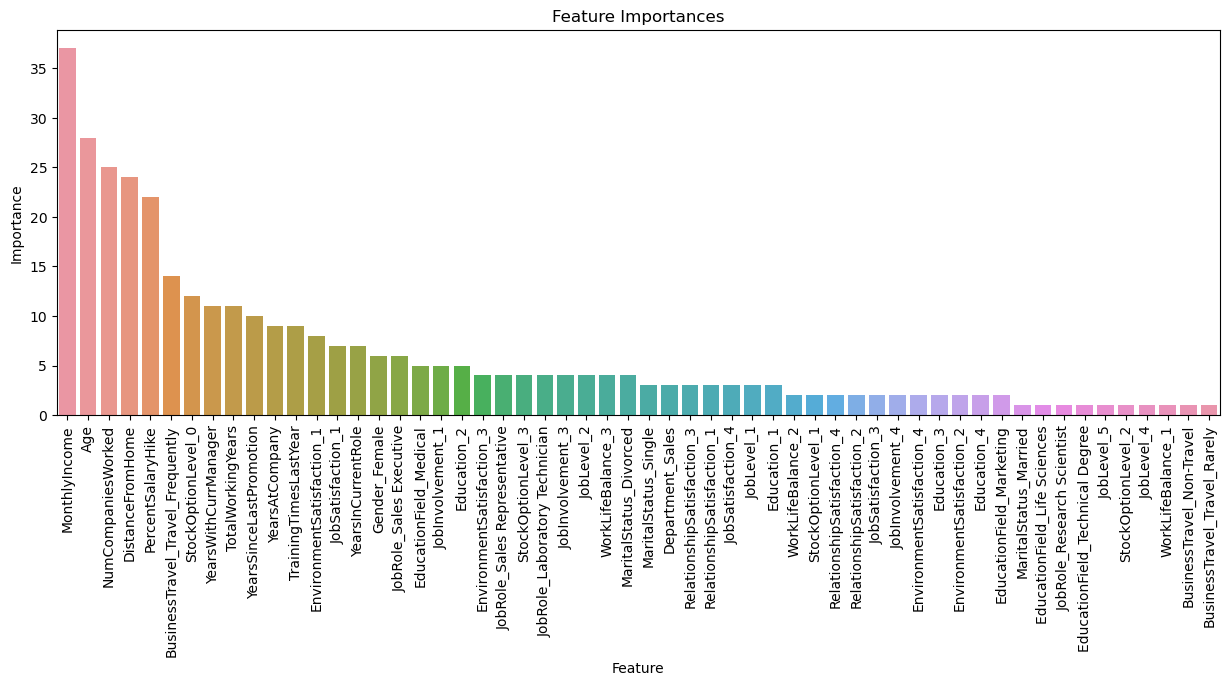

In [275]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=feature_importances, y="Importance", x = "Feature")
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [276]:
#hyperparameter tuning - iteration 1
param_test1 = { 'max_depth': range(1,12,2),
                'min_child_weight': range(1,10,2)
              }

gsearch1 = GridSearchCV(estimator=XGBClassifier(n_estimators=10, learning_rate = 0.3,gamma = 0 , 
                                                    colsample_bytree =1, subsample=1,objective= 'binary:logistic',
                                                   nthread=4, scale_pos_weight=1,
                                                   max_depth=5 , min_child_weight=2 ),
                        param_grid=param_test1, scoring='roc_auc', n_jobs=4, cv = 5)

gsearch1.fit(X_train_final,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=4,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_child_weight': range(1, 10, 2)},
             scoring='roc_auc')

In [277]:
gsearch1.cv_results_

{'mean_fit_time': array([0.05279346, 0.04372983, 0.03379149, 0.03551674, 0.03644376,
        0.03883471, 0.03221617, 0.02991476, 0.0393887 , 0.03592491,
        0.05581627, 0.05846629, 0.05647154, 0.05714216, 0.06216526,
        0.07492228, 0.06816263, 0.05995946, 0.05606585, 0.05060892,
        0.07578273, 0.05416965, 0.06664014, 0.06307158, 0.0548799 ,
        0.08426328, 0.05846386, 0.05135994, 0.04509063, 0.04335556]),
 'std_fit_time': array([0.00595391, 0.00660225, 0.00210813, 0.00192429, 0.00153136,
        0.00519276, 0.00775668, 0.00191782, 0.00499293, 0.00415724,
        0.0024497 , 0.00589498, 0.00914258, 0.00956204, 0.0086255 ,
        0.00745165, 0.00431905, 0.00279613, 0.00250955, 0.00593953,
        0.0092226 , 0.006117  , 0.00681094, 0.00523453, 0.00546364,
        0.01254275, 0.0058702 , 0.00398653, 0.00274669, 0.00393433]),
 'mean_score_time': array([0.01328626, 0.01120553, 0.0101891 , 0.01052074, 0.01050739,
        0.00986991, 0.01408153, 0.01456814, 0.00773454, 0.01

In [278]:
 gsearch1.best_params_

{'max_depth': 5, 'min_child_weight': 3}

In [279]:
gsearch1.best_score_

0.7657459445316588

In [280]:
#Hyperparameter tuning - Iteration 2

param_test2 = { 'max_depth': [4,5,6],
                'min_child_weight': [2,3,4]
              }

gsearch2 = GridSearchCV(estimator=XGBClassifier(n_estimators=10, learning_rate = 0.3,gamma = 0 , 
                                                    colsample_bytree =1, subsample=1,objective= 'binary:logistic',
                                                   nthread=4, scale_pos_weight=1,
                                                   max_depth=5 , min_child_weight=2 ),
                        param_grid=param_test2, scoring='roc_auc', n_jobs=-1, cv = 5)

gsearch2.fit(X_train_final,y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [2, 3, 4]},
             scoring='roc_auc')

In [281]:
gsearch2.cv_results_

{'mean_fit_time': array([0.13812771, 0.1561975 , 0.13698497, 0.11769395, 0.12361941,
        0.12492051, 0.14387174, 0.1351356 , 0.08860097]),
 'std_fit_time': array([0.05381701, 0.03697475, 0.02147869, 0.01892794, 0.01380346,
        0.01401431, 0.00807845, 0.02079441, 0.00830126]),
 'mean_score_time': array([0.02382874, 0.02436395, 0.0175972 , 0.0125145 , 0.01683507,
        0.01258674, 0.01237578, 0.00945811, 0.00938015]),
 'std_score_time': array([0.01019148, 0.01089859, 0.00838463, 0.00625725, 0.00999286,
        0.00629555, 0.00283186, 0.00773985, 0.00765886]),
 'param_max_depth': masked_array(data=[4, 4, 4, 5, 5, 5, 6, 6, 6],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=999999),
 'param_min_child_weight': masked_array(data=[2, 3, 4, 2, 3, 4, 2, 3, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=999999),
 'params': [{'max_dep

In [282]:
gsearch2.best_params_

{'max_depth': 5, 'min_child_weight': 3}

In [283]:
gsearch2.best_score_

0.7657459445316588

In [284]:
#Hyperparameter tuning - Iteration 3

param_test3 = {'gamma':[i/10 for i in range(0,5)] }

gsearch3 = GridSearchCV(estimator=XGBClassifier(n_estimators=10, learning_rate = 0.3,gamma = 0 , 
                                                    colsample_bytree =1, subsample=1,objective= 'binary:logistic',
                                                   nthread=4, scale_pos_weight=1,
                                                   max_depth=5 , min_child_weight=3 ),
                        param_grid=param_test3, scoring='roc_auc', n_jobs=-1, cv = 5)

gsearch3.fit(X_train_final,y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1, param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring='roc_auc')

In [285]:
gsearch3.cv_results_

{'mean_fit_time': array([0.13467522, 0.18605719, 0.22406645, 0.17464547, 0.11332836]),
 'std_fit_time': array([0.02400958, 0.05480858, 0.0083052 , 0.03008329, 0.03464566]),
 'mean_score_time': array([0.02179899, 0.02642279, 0.02301884, 0.01280074, 0.01320019]),
 'std_score_time': array([0.00584448, 0.00645838, 0.00548669, 0.00193994, 0.00491363]),
 'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
              mask=[False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'gamma': 0.0},
  {'gamma': 0.1},
  {'gamma': 0.2},
  {'gamma': 0.3},
  {'gamma': 0.4}],
 'split0_test_score': array([0.7869898 , 0.76581633, 0.76607143, 0.77366071, 0.77340561]),
 'split1_test_score': array([0.73914181, 0.73914181, 0.73914181, 0.73914181, 0.73914181]),
 'split2_test_score': array([0.73246991, 0.71206175, 0.71912611, 0.70983778, 0.70983778]),
 'split3_test_score': array([0.7999359, 0.7774359, 0.7625641, 0.7575641, 0.7575641]),
 'split4_test_score': array([0.77019231, 0.770

In [286]:
gsearch3.best_params_

{'gamma': 0.0}

In [287]:
gsearch3.best_score_

0.7657459445316588

In [288]:
# initialize model-2

xgb2= XGBClassifier(n_estimators=10, learning_rate = 0.3,gamma = 0 , 
                    colsample_bytree =1, subsample=1,objective= 'binary:logistic',
                    nthread=4, scale_pos_weight=1,
                    max_depth=5 , min_child_weight=3)

xgb2.fit(X_train_final,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [289]:
y_fit = xgb2.predict(X_train_final)
y_pred = xgb2.predict(X_test_final)

In [290]:
train_tuning_df['XGB2'] = eval_metrics(y_train,y_fit)
test_tuning_df['XGB2'] = eval_metrics(y_test,y_pred)

In [291]:
train_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.946,0.912,NaN,NaN
AUC_ROC,0.843,0.743,NaN,NaN
PrecisionScore,0.940,0.906,NaN,NaN
RecallScore,0.999,0.997,NaN,NaN
F1_Score,0.969,0.949,NaN,NaN


In [292]:
test_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.847,0.850,NaN,NaN
AUC_ROC,0.543,0.555,NaN,NaN
PrecisionScore,0.878,0.881,NaN,NaN
RecallScore,0.957,0.957,NaN,NaN
F1_Score,0.916,0.917,NaN,NaN


In [293]:
feature_importances2 = pd.Series(xgb2.get_booster().get_fscore()).sort_values(ascending=False)
feature_importances2 = feature_importances2.to_frame().reset_index()

In [294]:
feature_importances2 = feature_importances2.rename(columns={'index':'Features',0:'Importance'})
feature_importances2

,Features,Importance
0,MonthlyIncome,20.0
1,Age,18.0
2,DistanceFromHome,16.0
3,StockOptionLevel_0,12.0
4,NumCompaniesWorked,11.0
5,TrainingTimesLastYear,8.0
6,BusinessTravel_Travel_Frequently,8.0
7,PercentSalaryHike,7.0
8,YearsAtCompany,7.0
9,YearsWithCurrManager,6.0


Text(0.5, 1.0, 'Feature Importances')

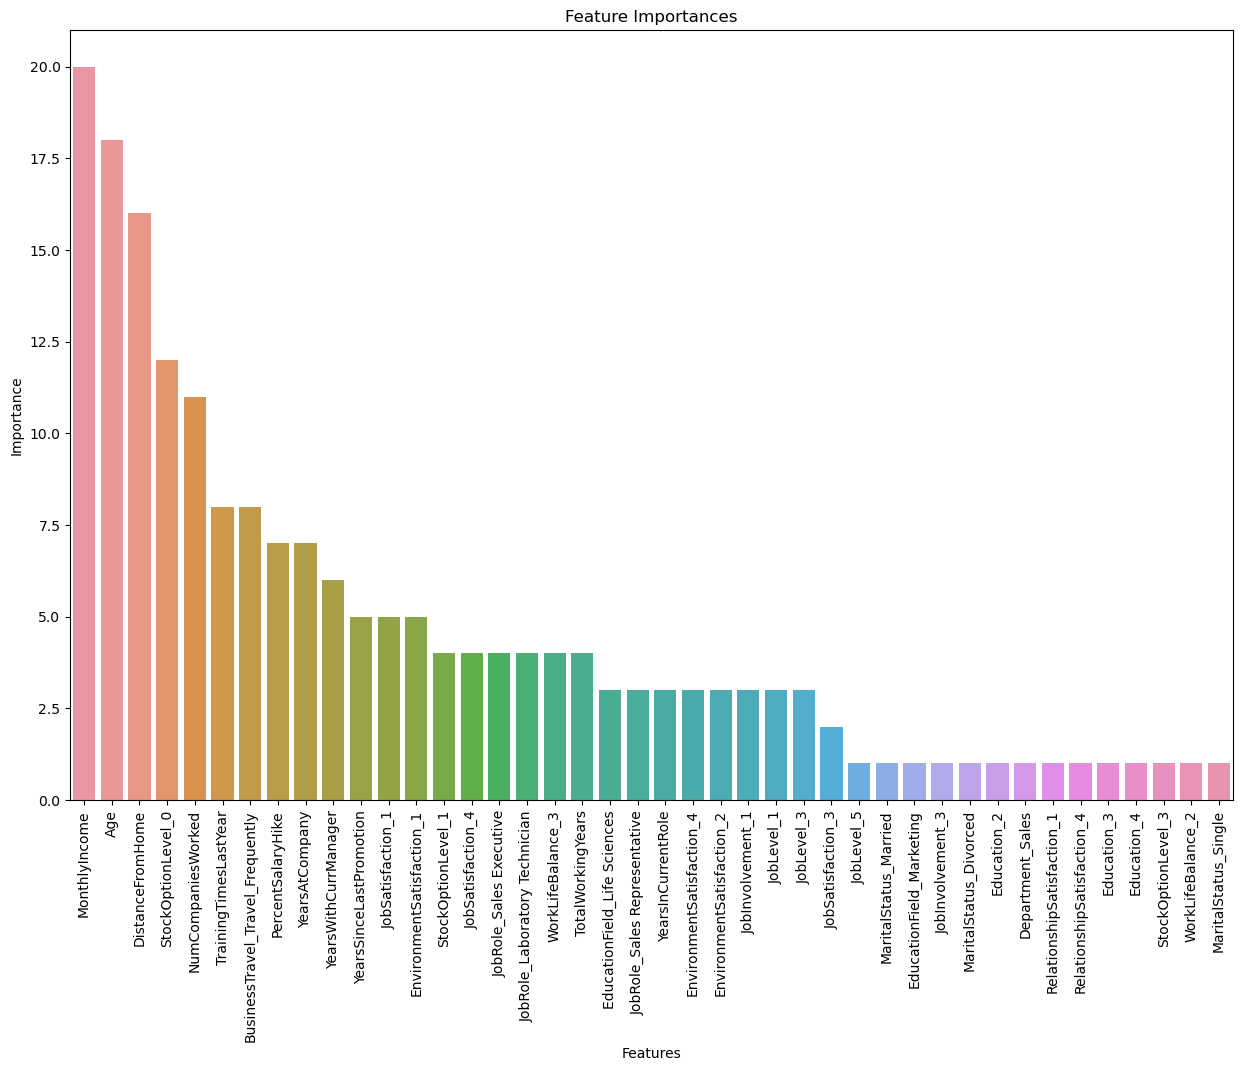

In [295]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=feature_importances2,x='Features',y='Importance')
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [296]:
#Hyperparameter tuning - Iteration 4

param_test4 = {'colsample_bytree':[i/10 for i in range(0,10)],
               'subsample':[i/10 for i in range(0,10)]}

gsearch4 = GridSearchCV(estimator=XGBClassifier(n_estimators=10, learning_rate = 0.3,gamma = 0 , 
                                                    colsample_bytree =1, subsample=1,objective= 'binary:logistic',
                                                   nthread=4, scale_pos_weight=1,
                                                   max_depth=5 , min_child_weight=3 ),
                        param_grid=param_test4, scoring='roc_auc', n_jobs=-1, cv = 5)

gsearch4.fit(X_train_final,y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_bin...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                              0.7, 0.8, 0.9],
                         'subsample': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                       0.8, 0.9]},
             scoring='roc_auc')

In [297]:
gsearch4.cv_results_

{'mean_fit_time': array([0.0586657 , 0.08686419, 0.07368917, 0.06352816, 0.06818871,
        0.06973753, 0.06080894, 0.06066484, 0.07535076, 0.06597729,
        0.06387272, 0.07250047, 0.08836813, 0.07534471, 0.07958474,
        0.07534323, 0.08472486, 0.09181795, 0.09115462, 0.10062857,
        0.04986243, 0.05846105, 0.07488327, 0.07588577, 0.07962847,
        0.08452568, 0.0826169 , 0.0814796 , 0.10497451, 0.11211081,
        0.04392543, 0.0621479 , 0.07399998, 0.08765864, 0.07544527,
        0.08794422, 0.09256749, 0.09242425, 0.09152188, 0.10192504,
        0.04913607, 0.06636748, 0.08555121, 0.08615885, 0.0972919 ,
        0.09730105, 0.10042439, 0.09419899, 0.10797238, 0.11607566,
        0.04201908, 0.06738086, 0.09010515, 0.09174738, 0.09378896,
        0.09849076, 0.10207229, 0.10277357, 0.11926885, 0.1253211 ,
        0.04714046, 0.06923184, 0.09244261, 0.10191755, 0.10218039,
        0.10221996, 0.10041313, 0.11521077, 0.11150951, 0.10606222,
        0.04401145, 0.0703351 ,

In [298]:
gsearch4.best_params_

{'colsample_bytree': 0.9, 'subsample': 0.8}

In [299]:
gsearch4.best_score_

0.7565791470434328

In [300]:
#hyperparameter tuning - iteration 5

param_grid5 = {'colsample_bytree':[i/100 for i in range(83,97)],
               'subsample':[i/100 for i in range(75,90)]
              }

gsearch5 = GridSearchCV(estimator=XGBClassifier(n_estimators=10,max_depth=5,learning_rate=0.3,gamma=0,
                                               min_child_weight=3, colsample_bytree=0.9,subsample=0.8,
                                               objective= 'binary:logistic',nthread=4, scale_pos_weight=1),
                        n_jobs=-1,scoring='roc_auc',cv=5,param_grid=param_grid5)



gsearch5.fit(X_train_final,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_b...
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.83, 0.84, 0.85, 0.86, 0.87,
                                              0.88, 0.89, 0.9, 0.91, 0.92, 0.93,
                                              0.94, 0.95, 0.96],
                         'subsample': [0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81,
                                       0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
                                       0.89]},
             scoring='roc_auc')

In [301]:
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([0.13398232, 0.12651219, 0.13382874, 0.11863785, 0.0967382 ,
         0.10414166, 0.11693377, 0.10193729, 0.12494559, 0.1090395 ,
         0.09853411, 0.11312752, 0.09792652, 0.10492191, 0.10692391,
         0.09751987, 0.11452622, 0.11203933, 0.10633688, 0.11013541,
         0.10471916, 0.10451508, 0.1058208 , 0.0969192 , 0.09982605,
         0.1039216 , 0.10292349, 0.10112038, 0.10272503, 0.09643307,
         0.10033879, 0.10743918, 0.1056251 , 0.11322584, 0.11092887,
         0.09753199, 0.10092554, 0.09792457, 0.10032372, 0.1187222 ,
         0.10651684, 0.10773263, 0.10952926, 0.10383401, 0.11632471,
         0.10302782, 0.11132135, 0.1054328 , 0.10713725, 0.11794424,
         0.11904554, 0.1042336 , 0.10432625, 0.10032248, 0.09931822,
         0.10712771, 0.09633012, 0.10062318, 0.11092362, 0.10734262,
         0.10313873, 0.10422907, 0.10332003, 0.1063231 , 0.10532479,
         0.10672708, 0.11013732, 0.09812756, 0.10051813, 0.09571362,
         0.104322

In [302]:
#hyperparameter tuning - iteration 6

param_grid6 = {'n_estimators':[1,10,100,1000],
              'learning_rate':[i/10 for i in range(1,10)]}

gsearch6 = GridSearchCV(estimator=XGBClassifier(n_estimators=10,max_depth=5,learning_rate=0.3,gamma=0,
                                               min_child_weight=3, colsample_bytree=0.86,subsample=0.83,
                                               objective= 'binary:logistic',nthread=4, scale_pos_weight=1),
                        n_jobs=-1,scoring='roc_auc',cv=5,param_grid=param_grid6)



gsearch6.fit(X_train_final,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.86,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9],
                         'n_estimators': [1, 10, 100, 1000]},
             scoring='roc_auc')

In [303]:
gsearch6.cv_results_

{'mean_fit_time': array([0.07571034, 0.17267442, 0.69758987, 5.52872305, 0.03181272,
        0.10122647, 0.68488388, 4.92789993, 0.031213  , 0.09692554,
        0.67568326, 4.68719826, 0.03109379, 0.11162705, 0.67455621,
        4.53609543, 0.03639836, 0.09676089, 0.69884548, 4.32376146,
        0.03140903, 0.10392408, 0.71026306, 4.46938391, 0.03134556,
        0.11298642, 0.72633519, 4.10850825, 0.03444014, 0.10229945,
        0.61082001, 4.33068647, 0.03330469, 0.1115416 , 0.71102223,
        4.78635397]),
 'std_fit_time': array([0.00357484, 0.0177535 , 0.01658264, 0.32231247, 0.00281612,
        0.01361881, 0.03552729, 0.11659686, 0.00136684, 0.00432214,
        0.02874914, 0.09089268, 0.00074444, 0.00736393, 0.01051449,
        0.20510363, 0.00653433, 0.00659851, 0.01293353, 0.09865275,
        0.00166162, 0.0058196 , 0.02358797, 0.07120295, 0.00254831,
        0.00902578, 0.00760539, 0.09877113, 0.00622102, 0.00674098,
        0.02558273, 0.08912326, 0.00058613, 0.00486044, 0.021

In [304]:
gsearch6.best_params_, gsearch6.best_score_

({'learning_rate': 0.3, 'n_estimators': 10}, 0.7688812140240712)

In [305]:
#hyperparameter tuning - iteration 7

param_grid7 = {'n_estimators':[i*10 for i in range(1,10)],
              'learning_rate':[i/100 for i in range(25,35)]}

gsearch7 = GridSearchCV(estimator=XGBClassifier(n_estimators=10,max_depth=5,learning_rate=0.3,gamma=0,
                                               min_child_weight=3, colsample_bytree=0.86,subsample=0.83,
                                               objective= 'binary:logistic',nthread=4, scale_pos_weight=1),
                        n_jobs=-1,scoring='roc_auc',cv=5,param_grid=param_grid7)



gsearch7.fit(X_train_final,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.86,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.25, 0.26, 0.27, 0.28, 0.29, 0.3,
                                           0.31, 0.32, 0.33, 0.34],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
             scoring='roc_auc')

In [306]:
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

({'mean_fit_time': array([0.23216119, 0.43134789, 0.60128441, 0.52035675, 0.57653837,
         0.67716689, 0.86397786, 0.88505001, 1.08720126, 0.21996555,
         0.20265346, 0.25234814, 0.34246869, 0.40207944, 0.46595426,
         0.51283355, 0.56133027, 0.63767891, 0.10404305, 0.18928347,
         0.28176517, 0.33766432, 0.38067622, 0.44213247, 0.54058852,
         0.59915171, 0.70180793, 0.09596114, 0.19431505, 0.26035371,
         0.31385455, 0.37521648, 0.44930096, 0.49640026, 0.57675047,
         0.67894907, 0.09999266, 0.18199167, 0.26987319, 0.32006874,
         0.37790751, 0.43200841, 0.52117491, 0.60833077, 0.69270453,
         0.10492272, 0.19384956, 0.25226874, 0.34839239, 0.38600688,
         0.44752498, 0.53507667, 0.61077142, 0.68161349, 0.09493656,
         0.18307352, 0.26156054, 0.33178511, 0.41442657, 0.47795434,
         0.58354321, 0.63723521, 0.75638127, 0.1010222 , 0.23615861,
         0.32521753, 0.33897052, 0.37969699, 0.43794456, 0.50563159,
         0.578123

In [307]:
#hyperparameter tuning - iteration 8

param_grid8 = {'n_estimators':range(12,27),
              'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
              'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]}

gsearch8 = GridSearchCV(estimator=XGBClassifier(n_estimators=20,max_depth=5,learning_rate=0.3,gamma=0,
                                               min_child_weight=3, colsample_bytree=0.86,subsample=0.83,
                                               objective= 'binary:logistic',nthread=4, scale_pos_weight=1),
                        n_jobs=-1,scoring='roc_auc',cv=5,param_grid=param_grid8)



gsearch8.fit(X_train_final,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.86,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=20, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'n_estimators': range(12, 27),
                         'reg_alpha': [1e-05, 0.01, 0.1, 1, 100],
                         'reg_lambda': [1e-05, 0.01, 0.1, 1, 100]},
             scoring='roc_auc')

In [308]:
gsearch8.cv_results_

{'mean_fit_time': array([0.17683306, 0.17371244, 0.12900028, 0.14655242, 0.11351008,
        0.13464146, 0.12947893, 0.13042378, 0.12931852, 0.12058883,
        0.1412293 , 0.1444335 , 0.14857545, 0.14121594, 0.10516663,
        0.14633689, 0.14270444, 0.14645181, 0.13680515, 0.12864146,
        0.09730954, 0.10466113, 0.11056414, 0.1023901 , 0.10720744,
        0.15152559, 0.13422236, 0.1414618 , 0.16701207, 0.14254637,
        0.18093386, 0.16633406, 0.14728951, 0.15475535, 0.13972297,
        0.15385041, 0.15377984, 0.15950823, 0.1541965 , 0.11989388,
        0.14436245, 0.14666047, 0.16323376, 0.15890479, 0.14389458,
        0.10876441, 0.10164304, 0.11525278, 0.11122794, 0.10265646,
        0.15874662, 0.14129987, 0.14152312, 0.14873853, 0.11604238,
        0.13818669, 0.13823576, 0.16452031, 0.19341822, 0.17605338,
        0.19701424, 0.14394398, 0.15382857, 0.15947313, 0.12520256,
        0.15259662, 0.12627716, 0.1259551 , 0.13286829, 0.11528215,
        0.09347262, 0.10093613,

In [309]:
 gsearch8.best_params_, gsearch8.best_score_

({'n_estimators': 20, 'reg_alpha': 1e-05, 'reg_lambda': 1}, 0.7810881737310309)

In [310]:
#hyperparameter tuning - iteration 9

param_grid9 = {'reg_lambda':[0.1,0.2,0.5,0.8,1,2,5,10]}

gsearch9 = GridSearchCV(estimator=XGBClassifier(n_estimators=20,max_depth=5,learning_rate=0.3,gamma=0,
                                               min_child_weight=3, colsample_bytree=0.86,subsample=0.83,
                                               objective= 'binary:logistic',nthread=4, scale_pos_weight=1,
                                               reg_alpha=1e-05,reg_lambda=1),
                        n_jobs=-1,scoring='roc_auc',cv=5,param_grid=param_grid9)



gsearch9.fit(X_train_final,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.86,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=20, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'reg_lambda': [0.1, 0.2, 0.5, 0.8, 1, 2, 5, 10]},
             scoring='roc_auc')

In [311]:
gsearch9.cv_results_

{'mean_fit_time': array([0.27038512, 0.24776607, 0.20205975, 0.18164287, 0.16945477,
        0.16844702, 0.18725195, 0.16113911]),
 'std_fit_time': array([0.00870762, 0.04751678, 0.01704611, 0.01611312, 0.00726066,
        0.0063928 , 0.00541797, 0.01870013]),
 'mean_score_time': array([0.02380815, 0.01930456, 0.01360035, 0.01139798, 0.0124114 ,
        0.01140027, 0.01099868, 0.00989976]),
 'std_score_time': array([0.00431783, 0.01124194, 0.00162274, 0.00079964, 0.00364181,
        0.00102386, 0.00062933, 0.00142473]),
 'param_reg_lambda': masked_array(data=[0.1, 0.2, 0.5, 0.8, 1.0, 2.0, 5.0, 10.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'reg_lambda': 0.1},
  {'reg_lambda': 0.2},
  {'reg_lambda': 0.5},
  {'reg_lambda': 0.8},
  {'reg_lambda': 1},
  {'reg_lambda': 2},
  {'reg_lambda': 5},
  {'reg_lambda': 10}],
 'split0_test_score': array([0.71237245, 0.75114796, 0.70242347, 0.77308673, 0.78392857,
        0.7

In [312]:
 gsearch9.best_params_, gsearch9.best_score_

({'reg_lambda': 1}, 0.7810881737310309)

In [313]:
#initialize 3rd model

xgb3 = XGBClassifier(n_estimators=20,max_depth=5,learning_rate=0.3,gamma=0,
                     min_child_weight=3, colsample_bytree=0.86,subsample=0.83,
                     objective= 'binary:logistic',nthread=4, scale_pos_weight=1,
                     reg_alpha=1e-05,reg_lambda=1)
xgb3.fit(X_train_final,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.86, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [314]:
y_fit=xgb3.predict(X_train_final)
y_pred=xgb3.predict(X_test_final)

In [315]:
train_tuning_df['XGB3'] =  eval_metrics(y_train,y_fit)
test_tuning_df['XGB3'] =  eval_metrics(y_test,y_pred)

In [316]:
train_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.946,0.912,0.930,NaN
AUC_ROC,0.843,0.743,0.805,NaN
PrecisionScore,0.940,0.906,0.927,NaN
RecallScore,0.999,0.997,0.994,NaN
F1_Score,0.969,0.949,0.960,NaN


In [317]:
test_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.847,0.850,0.867,NaN
AUC_ROC,0.543,0.555,0.609,NaN
PrecisionScore,0.878,0.881,0.894,NaN
RecallScore,0.957,0.957,0.961,NaN
F1_Score,0.916,0.917,0.926,NaN


In [318]:
feature_importances3 = pd.Series(xgb3.get_booster().get_fscore()).sort_values(ascending=False).reset_index()
feature_importances3 =feature_importances3.rename(columns={'index':'Feature',0:'Importance'})
feature_importances3


,Feature,Importance
0,MonthlyIncome,27.0
1,NumCompaniesWorked,23.0
2,Age,21.0
3,DistanceFromHome,17.0
4,YearsWithCurrManager,15.0
5,PercentSalaryHike,14.0
6,YearsAtCompany,11.0
7,TrainingTimesLastYear,9.0
8,YearsInCurrentRole,9.0
9,StockOptionLevel_0,9.0


Text(0.5, 1.0, 'Feature Importances')

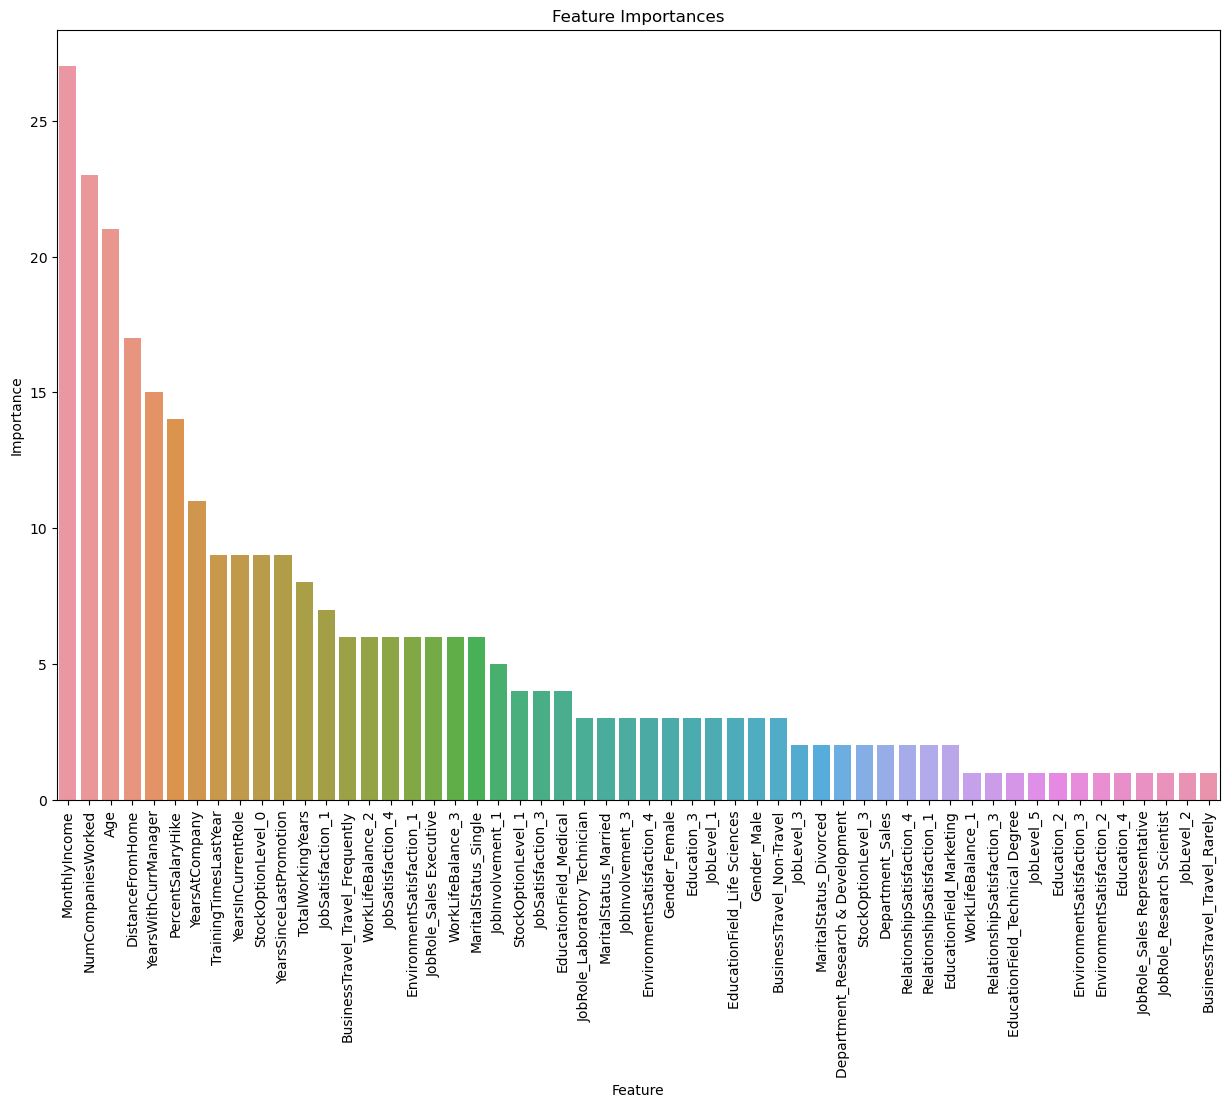

In [319]:
plt.figure(figsize=(15,10))
sns.barplot(data=feature_importances3,x='Feature',y='Importance')
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [320]:
#Remove features that don't have high feature importance
trim_features = feature_importances3.loc[:19,"Feature"].to_list()
trim_features

['MonthlyIncome',
 'NumCompaniesWorked',
 'Age',
 'DistanceFromHome',
 'YearsWithCurrManager',
 'PercentSalaryHike',
 'YearsAtCompany',
 'TrainingTimesLastYear',
 'YearsInCurrentRole',
 'StockOptionLevel_0',
 'YearsSinceLastPromotion',
 'TotalWorkingYears',
 'JobSatisfaction_1',
 'BusinessTravel_Travel_Frequently',
 'WorkLifeBalance_2',
 'JobSatisfaction_4',
 'EnvironmentSatisfaction_1',
 'JobRole_Sales Executive',
 'WorkLifeBalance_3',
 'MaritalStatus_Single']

In [321]:
#initialize 4th model

xgb4 = XGBClassifier(n_estimators=20,max_depth=5,learning_rate=0.3,gamma=0,
                     min_child_weight=3, colsample_bytree=0.86,subsample=0.83,
                     objective= 'binary:logistic',nthread=4, scale_pos_weight=1,
                     reg_alpha=1e-05,reg_lambda=1)
xgb4.fit(X_train_final[trim_features],y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.86, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [322]:
y_fit= xgb4.predict(X_train_final[trim_features])
y_pred = xgb4.predict(X_test_final[trim_features])

In [323]:
train_tuning_df['XGB4'] = eval_metrics(y_train,y_fit)
test_tuning_df['XGB4'] = eval_metrics(y_test,y_pred)

In [324]:
feature_importances4 = pd.Series(xgb4.get_booster().get_fscore()).sort_values(ascending=False).reset_index()
feature_importances4 = feature_importances4.rename(columns={'index':'Feature',0:'Importance'})

In [325]:
feature_importances4

,Feature,Importance
0,MonthlyIncome,52.0
1,DistanceFromHome,31.0
2,Age,27.0
3,NumCompaniesWorked,25.0
4,PercentSalaryHike,23.0
5,TotalWorkingYears,18.0
6,YearsWithCurrManager,14.0
7,YearsSinceLastPromotion,13.0
8,YearsInCurrentRole,12.0
9,TrainingTimesLastYear,12.0


Text(0.5, 1.0, 'Feature Importances')

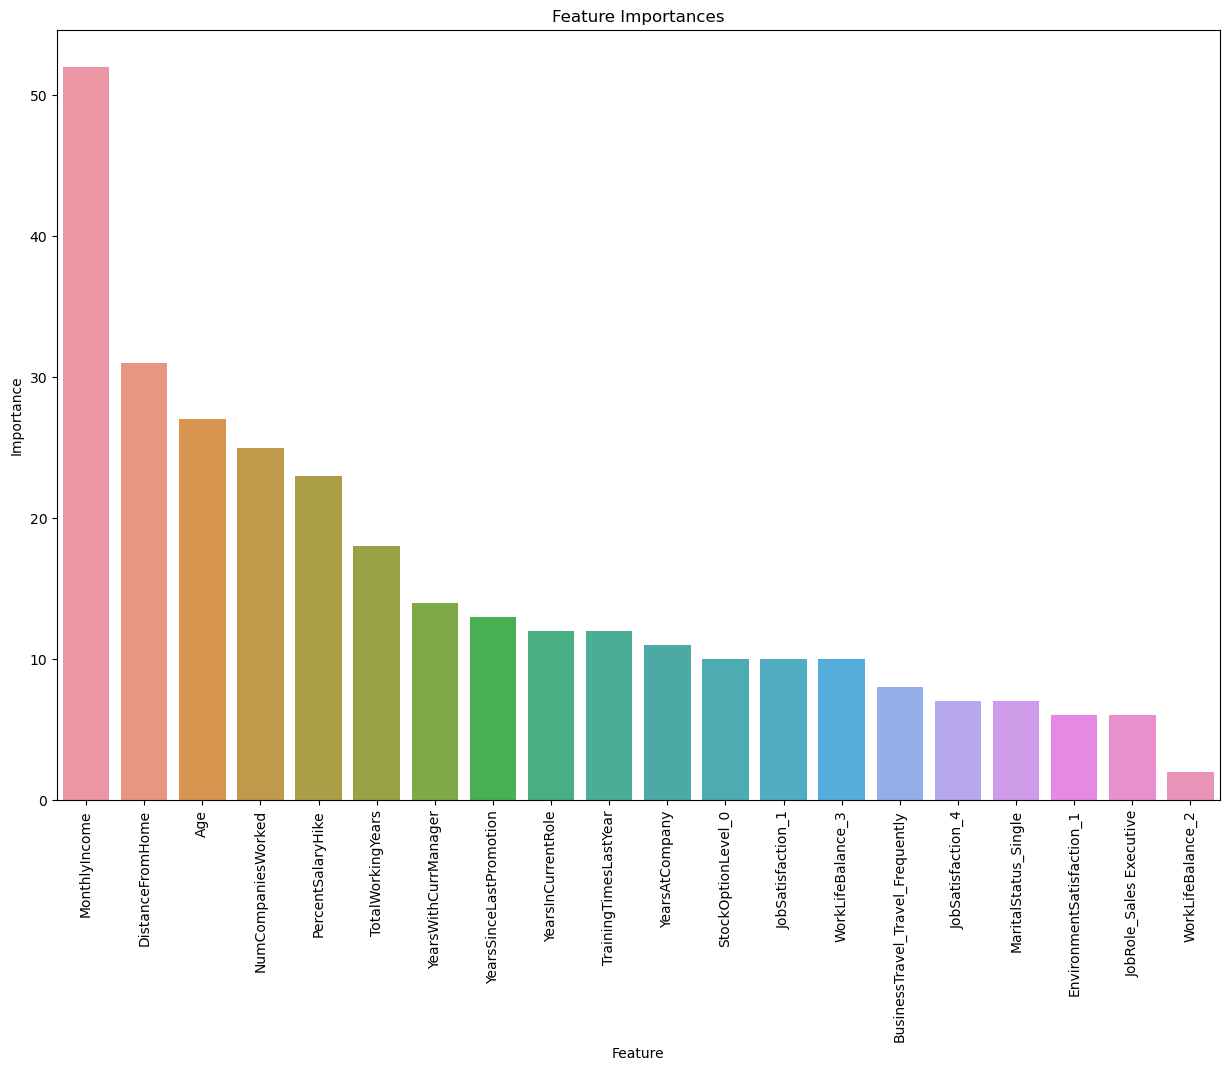

In [326]:
plt.figure(figsize=(15,10))
sns.barplot(data=feature_importances4,x='Feature',y='Importance')
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [327]:
train_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.946,0.912,0.930,0.920
AUC_ROC,0.843,0.743,0.805,0.781
PrecisionScore,0.940,0.906,0.927,0.919
RecallScore,0.999,0.997,0.994,0.991
F1_Score,0.969,0.949,0.960,0.954


In [328]:
test_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.847,0.850,0.867,0.857
AUC_ROC,0.543,0.555,0.609,0.581
PrecisionScore,0.878,0.881,0.894,0.887
RecallScore,0.957,0.957,0.961,0.957
F1_Score,0.916,0.917,0.926,0.921


## SHAP for Model Interpretability

In [346]:
!pip install shap
!pip install numba --upgrade

import shap

  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/79/89/2d924ca60dbf949f18a6fec223a2445f5f428d9a5f97a6b29c2122319015/numba-0.60.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for llvmlite<0.44,>=0.43.0dev0 from https://files.pythonhosted.org/packages/20/ab/ed5ed3688c6ba4f0b8d789da19fd8e30a9cf7fc5852effe311bc5aefe73e/llvmlite-0.43.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   -- ------------------------------------- 0.2/2.7 MB 5.3 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.7 MB 7.4 MB/s eta 0:00:01
   --------- ------------------------------ 0.7/2.7 MB 7.0 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.7 MB 6.8 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.7 MB 7.4 MB/s eta 0:00:01
   ----------------------- ---------------- 1.6/2.7 MB 7.1 MB/s eta 0:00:01
   ----------------------- --------------

### 1. Waterfall Plot

In [349]:
#Create Tree Explainer object that can calculate SHAP values
explainer = shap.TreeExplainer(xgb3)

In [351]:
#get shap values
shap_values = explainer(X_test_final)


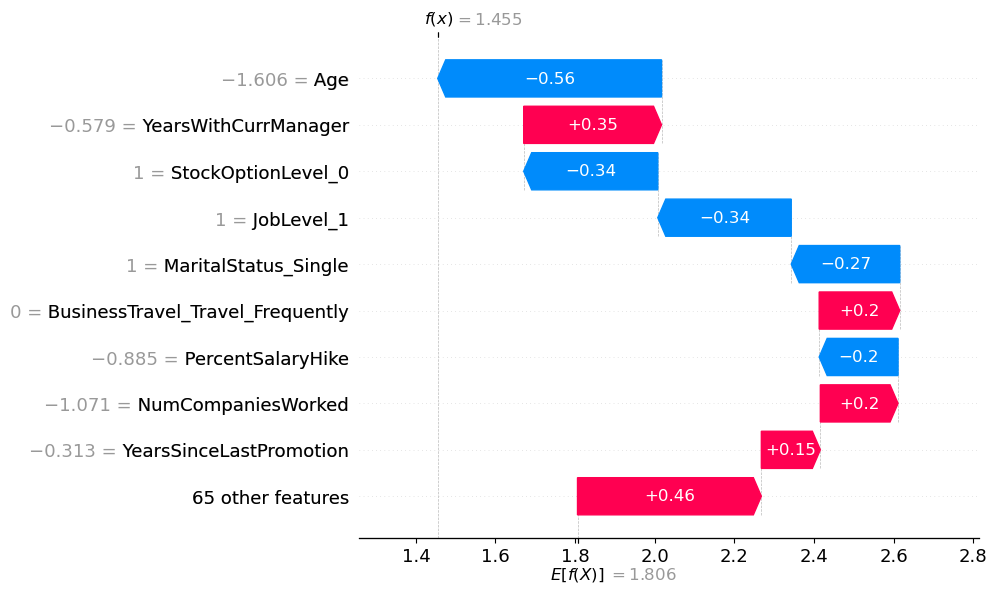

In [353]:
#Plot
idx = 14
# explanation = shap.Explanation(shap_values.values[:,:,1], shap_values.base_values[:,1], feature_names=X_test_final.columns, data = X_test_final.values)
shap.plots.waterfall(shap_values[idx])

### 2. Beeswarm Plot

<Axes: xlabel='SHAP value (impact on model output)'>

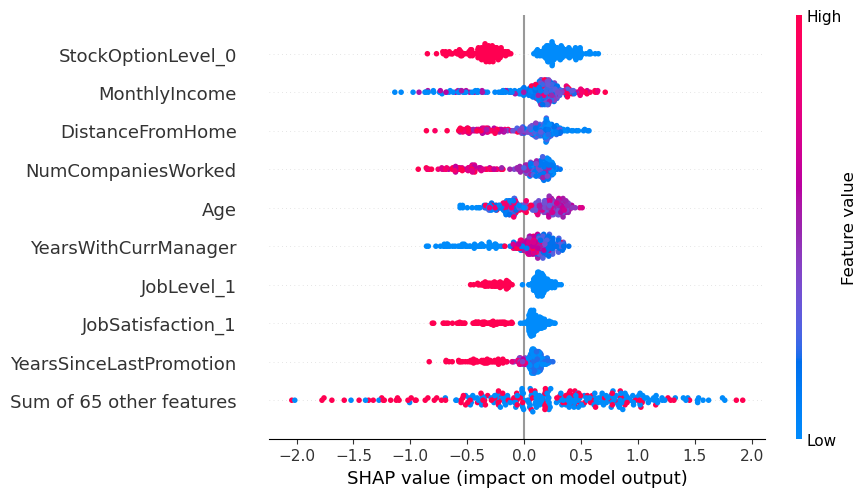

In [357]:
shap.plots.beeswarm(shap_values,show=False)

### 3. Summary Plot

In [361]:
shap_interaction = explainer.shap_interaction_values(X_test_final)

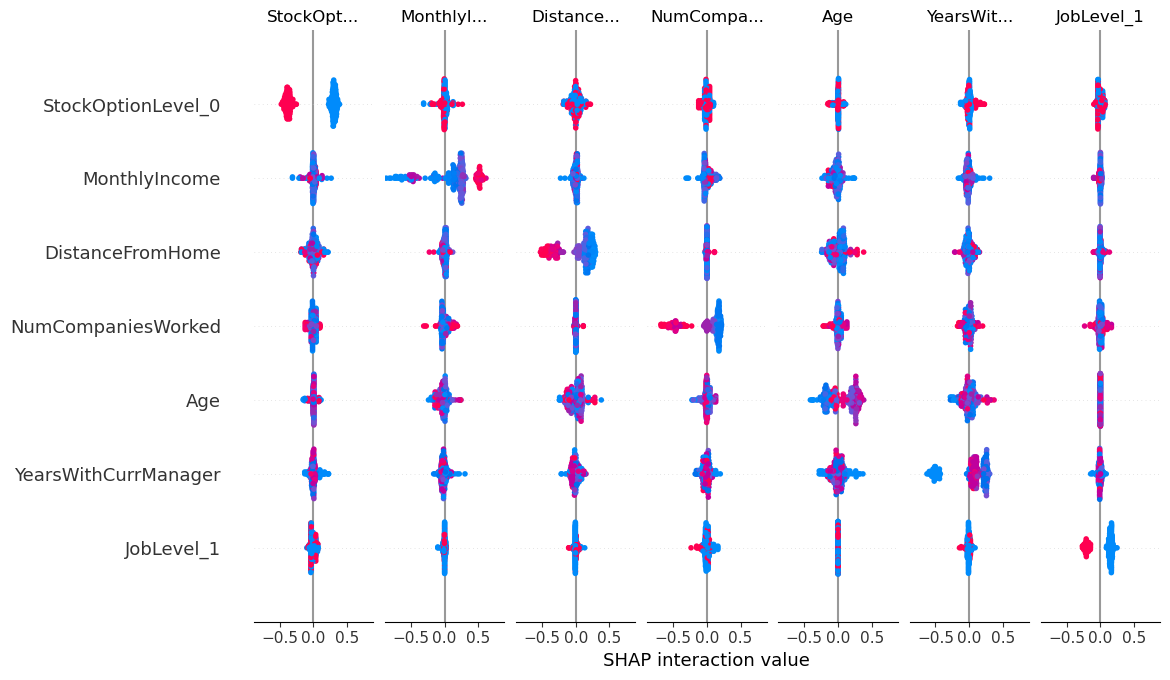

In [362]:
#Display summary plot
shap.summary_plot(shap_interaction, X_test_final, show=False)